# Group Wiki Entry (Group 5)
# Rotten Tomatoes Movie Ratings: Industry and Audience Trend Analysis

*Group Members:*
- *Pei I Wu*
- *Abu Bakar Siddique*
- *Eleanor Ruth Thomas*
- *Farmand Bazdiditehrani*
- *Jaykumar Himatbhai Savani*
- *Mohammad Tabish Mohd Iqbal Momin*

### Dataset Description
***Movie Ratings dataset: 16638 datapoints (rows) and 17 features (columns)***
- **movie_title**: Name of the movie
- **movie_info**: A short summary of the movie
- **critics_consensus**: The consensus opinion of the critics as one statement
- **rating**: A film's suitability for different audiences based on its content (PG, R, PG-13, NC17, ...)
- **genre**: Different genres associated with the movies
- **directors**: Name of the director/s
- **writers**: Name of writer/s
- **cast**: Name of the cast (actors)
- **in_theaters_date**: The exact date that the movie was aired on cinemas and theaters
- **on_streaming_date**: The exact date that the movie was released on streaming services
- **runtime_in_minutes**: Duration of the movie in minutes
- **studio_name**: Name of the producing studio 
- **tomatometer_status**: Status of the movie on Rotten Tomatoes website (Rotten, Fresh, Certified Fresh)
- **tomatometer_rating**: Critic's rating of the movie out of 100 on Rotten Tomatoes website
- **tomatometer_count**: Number of critics who have rated a movie
- **audience_rating**: Audience's rating of the movie out of 100 on Rotten Tomatoes website
- **audience_count**: Number of audiences (users) who have rated a movie

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import ast
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from itertools import combinations
from collections import Counter
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### Importing the Dataset

In [55]:
df = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\WS2425\\Applied Statistical Data Analysis\\Group Work Datasets\\Rotten Tomatoes Movies.csv")
df.head(2)

movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   

                                               genre          directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...     Chris Columbus   
1                                             Comedy  Nicole Holofcener   

             writers                                               cast  \
0       Craig Titley  Logan Lerman, Brandon T. Jackson, Alexandra Da...   
1  Nicole Holofcener  Catherine Keener, Amanda Peet, Oliver Platt, R...   

  in_theaters_date on_streaming_date  runtime_in_minutes  \
0       2010-02-12        2010-06-29                83.0   
1       2010-04-30        2010-10-19                90.0   

              studio_name tomatometer_status  tomatometer_rating  \
0        20th Century Fox             Rotten                  49   
1  Sony Pictures Classics    Certified Fresh                  86   

   tomatometer_count  audience_rating  audience_count  
0                144             53.0        254287.0  
1                140             64.0         11567.0

*There don't appear to be any redundant columns from first inspection. So we don't have to remove any column for now*

### Data Inspection

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

*All columns seem to be in the right type/format. Dates are stored in the correct format and ratings and counts are also stored whether in float or integer!*

In [34]:
df.describe()

runtime_in_minutes  tomatometer_rating  tomatometer_count  \
count        16483.000000        16638.000000       16638.000000   
mean           102.391494           60.466522          56.607104   
std             25.028011           28.587230          66.383800   
min              1.000000            0.000000           5.000000   
25%             90.000000           38.000000          12.000000   
50%             99.000000           66.000000          28.000000   
75%            111.000000           86.000000          76.000000   
max           2000.000000          100.000000         497.000000   

       audience_rating  audience_count  
count     16386.000000    1.638600e+04  
mean         60.470829    1.524797e+05  
std          20.462368    1.817736e+06  
min           0.000000    5.000000e+00  
25%          45.000000    8.642500e+02  
50%          62.000000    4.876500e+03  
75%          77.000000    2.875200e+04  
max         100.000000    3.579764e+07

***This table gives us the overall descriptive analysis of the dataset and we can clearly see that the average duration of movies are more than 100 minutes and the average tomatometer rating is a bit upper than 60, which makes them eligible to be granted the "Fresh" or "Certified Fresh" status!***

***Another interesting thing is that the average rating of critics and audiences are basically similar!! (60.46 ~ 60.47)***

In [35]:
df.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
audience_count         252
dtype: int64

In [36]:
df.isnull().sum().sum()

12009

*We have a lot of missing values! Especially in "critics_consensus" and "writers" columns. For further analysis in future, writers could be easily filled up to have a better dataset, but for this case, dealing with writers and critics consensus requires NLP and other language evaluation tools!* 

In [37]:
df['movie_info'][0]

"A teenager discovers he's the descendant of a Greek god and sets out on an adventure to settle an on-going battle between the gods."

In [38]:
df['critics_consensus'][0]

'Though it may seem like just another Harry Potter knockoff, Percy Jackson benefits from a strong supporting cast, a speedy plot, and plenty of fun with Greek mythology.'

**The above-mentioned columns are of no use for our analyses, so we will drop them.**

In [56]:
df = df.drop(columns=['movie_info', 'critics_consensus'])
df.head(1)

movie_title rating  \
0  Percy Jackson & the Olympians: The Lightning T...     PG   

                                               genre       directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   

        writers                                               cast  \
0  Craig Titley  Logan Lerman, Brandon T. Jackson, Alexandra Da...   

  in_theaters_date on_streaming_date  runtime_in_minutes       studio_name  \
0       2010-02-12        2010-06-29                83.0  20th Century Fox   

  tomatometer_status  tomatometer_rating  tomatometer_count  audience_rating  \
0             Rotten                  49                144             53.0   

   audience_count  
0        254287.0

### Data Cleaning
#### - Dealing with missing values

*We are going to drop those columns that have fewer missing values (Less than 2% of the whole dataset ~ 320).*

*And, this leaves "writers", "in_theaters_date", and "studio_name" which two of them are categorical and the other one is date type.*

In [57]:
df_clean = df.dropna(subset=['genre', 'directors', 'cast', 'on_streaming_date', 'runtime_in_minutes', 'audience_rating', 'audience_count'])
df_clean.isnull().sum()

movie_title              0
rating                   0
genre                    0
directors                0
writers               1066
cast                     0
in_theaters_date       629
on_streaming_date        0
runtime_in_minutes       0
studio_name            323
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating          0
audience_count           0
dtype: int64

***After this cleaning, 747 rows has been deleted and we have 15891 rows left to apply the analyses on!***

In [41]:
df_clean.describe()

runtime_in_minutes  tomatometer_rating  tomatometer_count  \
count        15891.000000        15891.000000       15891.000000   
mean           102.744509           60.100686          57.680951   
std             25.119749           28.578470          66.669814   
min              1.000000            0.000000           5.000000   
25%             90.000000           38.000000          12.000000   
50%             99.000000           65.000000          29.000000   
75%            111.000000           85.000000          79.000000   
max           2000.000000          100.000000         497.000000   

       audience_rating  audience_count  
count     15891.000000    1.589100e+04  
mean         60.381851    1.568951e+05  
std          20.465426    1.845620e+06  
min           0.000000    5.000000e+00  
25%          44.000000    9.430000e+02  
50%          62.000000    5.170000e+03  
75%          77.000000    3.071700e+04  
max         100.000000    3.579764e+07

*After cleaning the dataset, the average rating of critics and audiences have differentiated a bit!*

#### Dealing with duplicated values

In [42]:
print(df_clean.nunique())

movie_title           15398
rating                    8
genre                  1066
directors              7913
writers               11740
cast                  15875
in_theaters_date       5505
on_streaming_date      2205
runtime_in_minutes      199
studio_name            2737
tomatometer_status        3
tomatometer_rating      101
tomatometer_count       390
audience_rating          98
audience_count        10782
dtype: int64


In [58]:
title_counts = df_clean['movie_title'].value_counts()
duplicates_only = title_counts[title_counts > 1]
print(duplicates_only)

movie_title
Home                    5
Gloria                  4
Alice in Wonderland     4
The Three Musketeers    4
Wuthering Heights       4
                       ..
Hellboy                 2
King Charles III        2
Bait                    2
The Matador             2
Blackbird               2
Name: count, Length: 453, dtype: int64


***We notice that for example in the movie_title column, we have a few duplicates since the number of unique values is not equal to the total number of rows! Then By checking the values we would notice that some movies such as "Alice in Wonderland" have been repeated 4 times. But, in the following we notice the actual number of duplicates is only one! And, this is because of the fact that those repeated movie titles are remakes of a movie in different versions over the years and we don't need to exclude them.***

In [44]:
df_clean[df_clean['movie_title'] == 'Alice in Wonderland']

movie_title rating  \
809   Alice in Wonderland      G   
956   Alice in Wonderland      G   
1807  Alice in Wonderland     PG   
1810  Alice in Wonderland     NR   

                                                  genre  \
809   Animation, Classics, Comedy, Kids & Family, Sc...   
956   Action & Adventure, Comedy, Kids & Family, Tel...   
1807  Action & Adventure, Kids & Family, Science Fic...   
1810           Kids & Family, Science Fiction & Fantasy   

                                            directors  \
809   Clyde Geronimi, Wilfred Jackson, Hamilton Luske   
956                                      Nick Willing   
1807                                       Tim Burton   
1810                                 Norman Z. McLeod   

                                                writers  \
809   Winston Hibler, Bill Peet, Joe Grant, Aldous H...   
956                                        Peter Barnes   
1807                                   Linda Woolverton   
1810      Joseph L. Mankiewicz, William Cameron Menzies   

                                                   cast in_theaters_date  \
809   Kathryn Beaumont, Ed Wynn, Richard Haydn, Ster...       1951-07-28   
956   Tina Majorino, Martin Short, Whoopi Goldberg, ...       1999-02-28   
1807  Johnny Depp, Mia Wasikowska, Helena Bonham Car...       2010-03-05   
1810  Charlotte Henry, Gary Cooper, Roscoe Ates, Edw...       1933-12-22   

     on_streaming_date  runtime_in_minutes            studio_name  \
809         2011-02-01                75.0             Film Chest   
956         2001-02-20               150.0  Artisan Entertainment   
1807        2010-06-01               108.0   Walt Disney Pictures   
1810        2010-03-02                77.0      Universal Studios   

     tomatometer_status  tomatometer_rating  tomatometer_count  \
809               Fresh                  81                 31   
956              Rotten                  33                  6   
1807             Rotten                  51                273   
1810              Fresh                  67                  6   

      audience_rating  audience_count  
809              78.0        574219.0  
956              62.0         24488.0  
1807             55.0        480070.0  
1810             58.0           692.0

In [45]:
print(df_clean.duplicated().sum())

1


In [59]:
fully_duplicated_rows = df_clean[df_clean.duplicated(keep=False)]  # keep=False keeps all duplicates
print(fully_duplicated_rows)

           movie_title rating  genre     directors        writers  \
8495  King Charles III     NR  Drama  Rupert Goold  Mike Bartlett   
8496  King Charles III     NR  Drama  Rupert Goold  Mike Bartlett   

                                                   cast in_theaters_date  \
8495  Oliver Chris, Richard Goulding, Charlotte Rile...       2017-05-14   
8496  Oliver Chris, Richard Goulding, Charlotte Rile...       2017-05-14   

     on_streaming_date  runtime_in_minutes studio_name tomatometer_status  \
8495        2017-06-27                88.0         NaN              Fresh   
8496        2017-06-27                88.0         NaN              Fresh   

      tomatometer_rating  tomatometer_count  audience_rating  audience_count  
8495                 100                  9             48.0            65.0  
8496                 100                  9             48.0            65.0  


In [60]:
df_cleaned = df_clean.drop_duplicates()
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned

movie_title rating  \
0      Percy Jackson & the Olympians: The Lightning T...     PG   
1                                            Please Give      R   
2                                                     10      R   
3                        12 Angry Men (Twelve Angry Men)     NR   
4                           20,000 Leagues Under The Sea      G   
...                                                  ...    ...   
15885                                               Zoom     PG   
15886                                          Zoot Suit      R   
15887                                           Zootopia     PG   
15888                                               Zulu     PG   
15889                                          Zulu Dawn     PG   

                                                   genre  \
0      Action & Adventure, Comedy, Drama, Science Fic...   
1                                                 Comedy   
2                                        Comedy, Romance   
3                                        Classics, Drama   
4               Action & Adventure, Drama, Kids & Family   
...                                                  ...   
15885          Action & Adventure, Comedy, Kids & Family   
15886                   Drama, Musical & Performing Arts   
15887              Action & Adventure, Animation, Comedy   
15888                                    Classics, Drama   
15889  Action & Adventure, Art House & International,...   

                                  directors                       writers  \
0                            Chris Columbus                  Craig Titley   
1                         Nicole Holofcener             Nicole Holofcener   
2                             Blake Edwards                 Blake Edwards   
3                              Sidney Lumet                 Reginald Rose   
4                         Richard Fleischer                   Earl Felton   
...                                     ...                           ...   
15885                          Peter Hewitt  Adam Rifkin, David Berenbaum   
15886                           Luis Valdez                   Luis Valdez   
15887  Byron Howard, Rich Moore, Jared Bush     Jared Bush, Phil Johnston   
15888           Cy Endfield, Cyril Endfield     Cy Endfield, John Prebble   
15889                        Douglas Hickox   Cy Endfield, Anthony Storey   

                                                    cast in_theaters_date  \
0      Logan Lerman, Brandon T. Jackson, Alexandra Da...       2010-02-12   
1      Catherine Keener, Amanda Peet, Oliver Platt, R...       2010-04-30   
2      Dudley Moore, Bo Derek, Julie Andrews, Robert ...       1979-10-05   
3      Martin Balsam, John Fiedler, Lee J. Cobb, E.G....       1957-04-13   
4      James Mason, Kirk Douglas, Paul Lukas, Peter L...       1954-01-01   
...                                                  ...              ...   
15885  Tim Allen, Courteney Cox, Chevy Chase, Spencer...       2006-08-11   
15886  Daniel Valdez, Edward James Olmos, Charles Aid...       1981-10-02   
15887  Ginnifer Goodwin, Jason Bateman, Idris Elba, J...       2016-03-04   
15888  Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...       1964-06-17   
15889  Burt Lancaster, Peter O'Toole, Simon Ward, Joh...       1979-12-14   

      on_streaming_date  runtime_in_minutes                    studio_name  \
0            2010-06-29                83.0               20th Century Fox   
1            2010-10-19                90.0         Sony Pictures Classics   
2            1997-08-27               118.0                    Waner Bros.   
3            2001-03-06                95.0           Criterion Collection   
4            2003-05-20               127.0                         Disney   
...                 ...                 ...                            ...   
15885        2007-09-02                88.0    Sony Pictures Entertainment   
15886        2003-05-27               104.0  

#### ***Finally, we are left with 15890 movies (rows) to work on!***

### Correlations

Pearson Correlation Matrix:

Spearman Correlation Matrix:


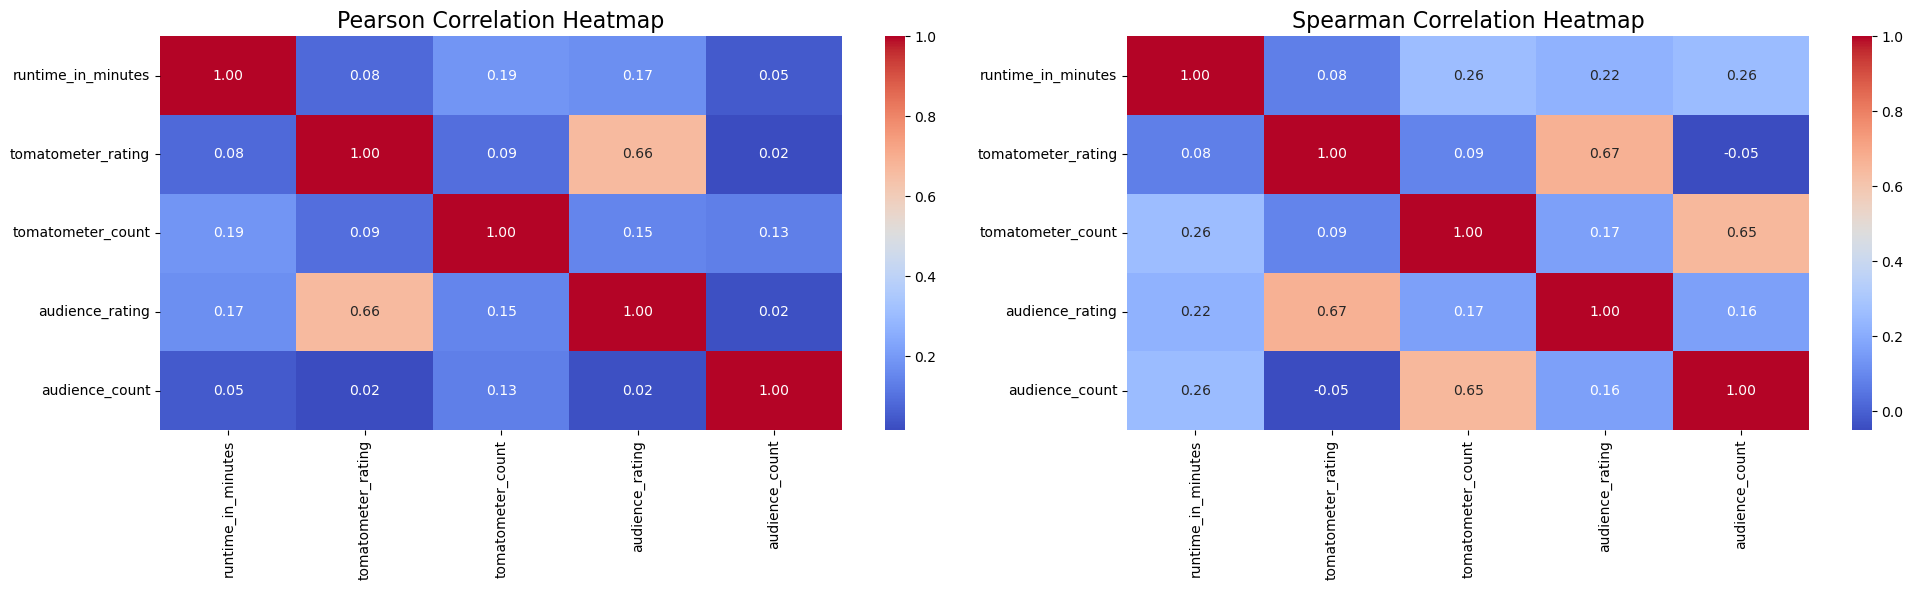

In [48]:
numeric_data = df_cleaned.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

pearson_corr = numeric_data.corr(method='pearson')
spearman_corr = numeric_data.corr(method='spearman')

print("Pearson Correlation Matrix:")
print("\nSpearman Correlation Matrix:")

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap', fontsize=16)
plt.yticks(fontsize=10)

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Heatmap', fontsize=16)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Overall insights:
- As we already noticed that, tomatometer ratings and audience ratings are strongly and positively correlated.
- The count of the audience and critics are also positively correlated and it suggests that the more famous a movie is, the higher number of reviews it would get.
- Ratings are also weakly correlated to the duration of a movie.

## EDA and Data Visualization

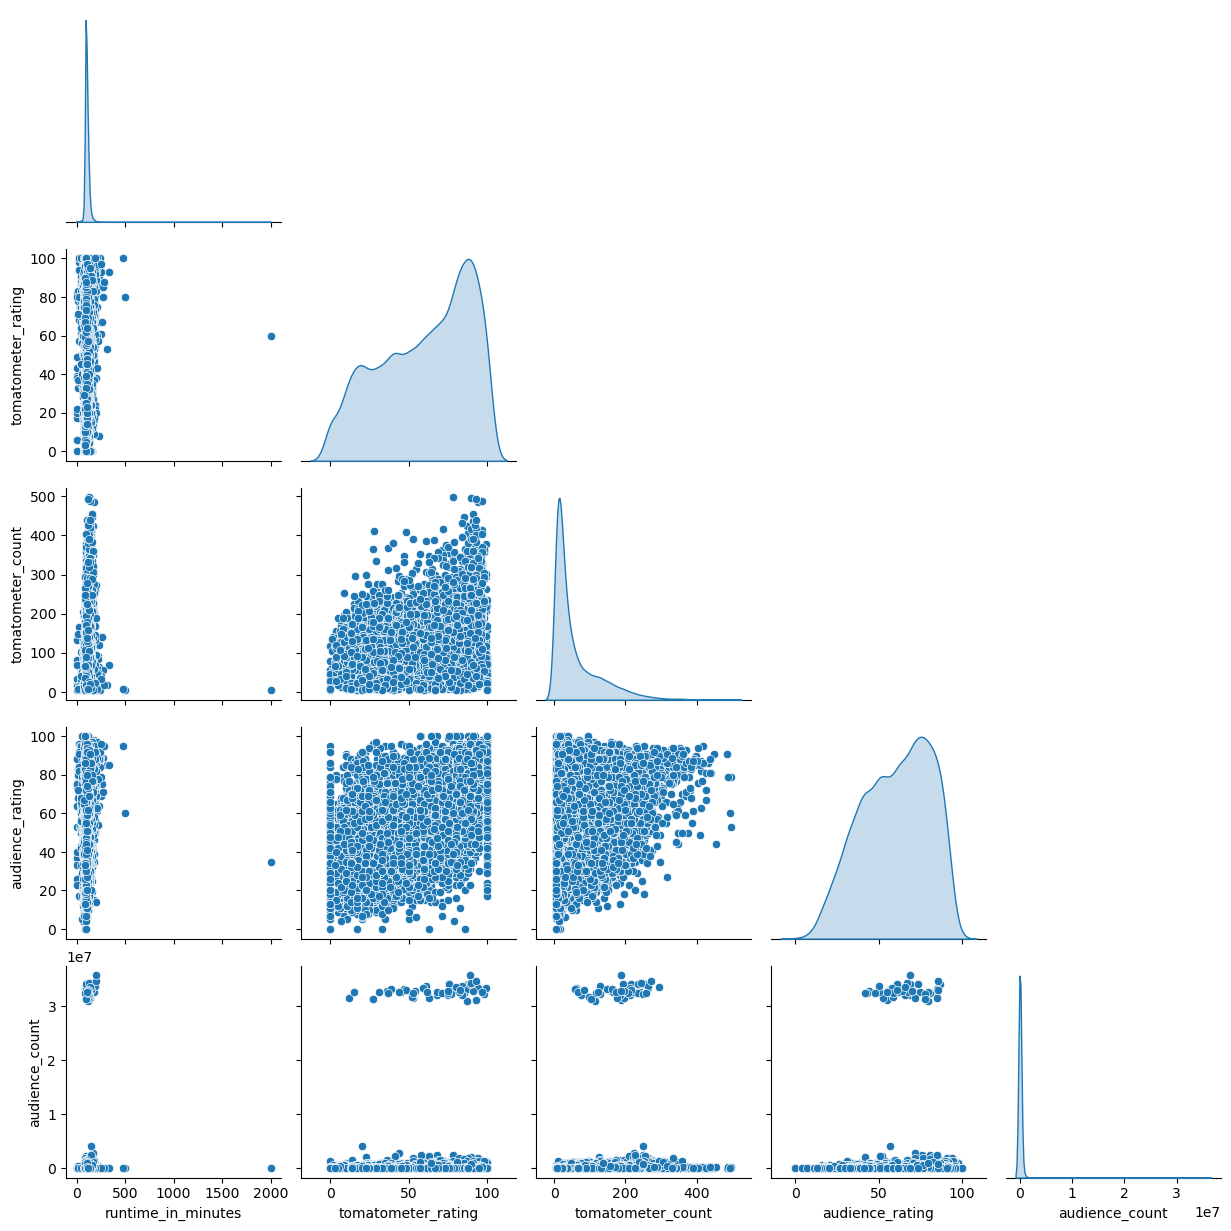

In [49]:
selected_columns = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']
sns.pairplot(df_cleaned[selected_columns], diag_kind='kde', corner=True)

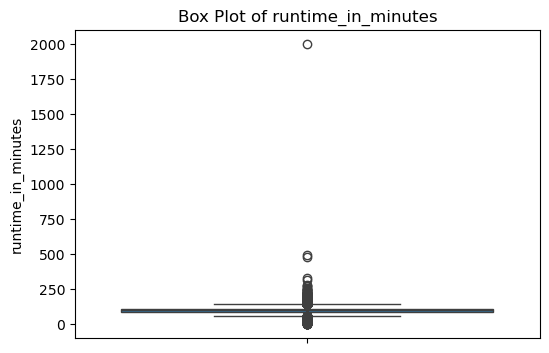

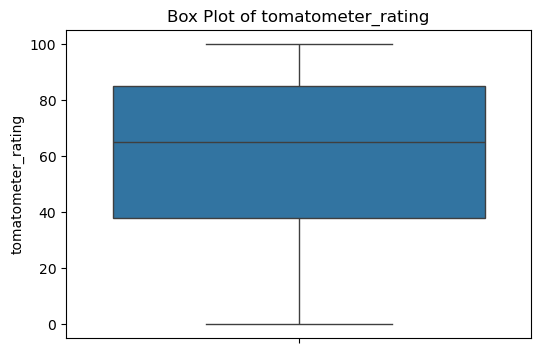

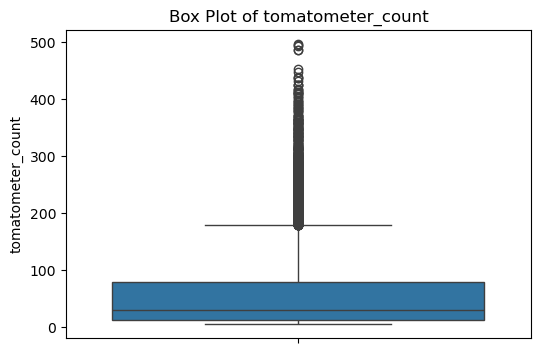

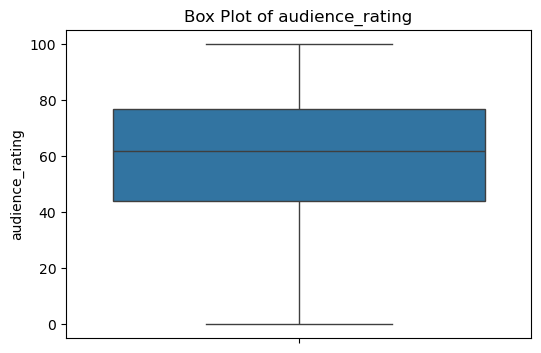

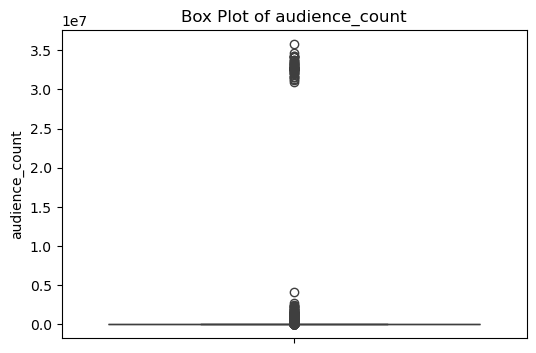

In [50]:
numerical_cols = df_cleaned.select_dtypes(include=['number'])

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_cleaned[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()

***The first plot shows that there exist a couple of outliers***

In [61]:
df_cleaned[df_cleaned['runtime_in_minutes']>300]

movie_title rating  \
902                             Love on the Run     NR   
1815                           1900 (Novecento)      R   
3972                                     Carlos     NR   
9957   Never Sleep Again: The Elm Street Legacy     NR   
12973                              Terror Tract      R   

                                                   genre  \
902                            Classics, Comedy, Romance   
1815                    Art House & International, Drama   
3972   Art House & International, Classics, Drama, Te...   
9957   Documentary, Musical & Performing Arts, Televi...   
12973                 Comedy, Horror, Mystery & Suspense   

                                               directors  \
902                                        W.S. Van Dyke   
1815                                 Bernardo Bertolucci   
3972                                     Olivier Assayas   
9957                       Andrew Kasch, Daniel Farrands   
12973  Lance W. Dreesen, Clint Hutchinson, Clint Hutc...   

                                                 writers  \
902          John Lee Mahin, Manuel Seff, Gladys Hurlbut   
1815   Franco Arcalli, Giuseppe Bertolucci, Bernardo ...   
3972                         Olivier Assayas, Dan Franck   
9957                                       Thommy Hutson   
12973                                    Clint Hutchison   

                                                    cast in_theaters_date  \
902    Joan Crawford, Clark Gable, Franchot Tone, Reg...       1936-11-20   
1815   Burt Lancaster, Gérard Depardieu, Robert De Ni...       1977-11-04   
3972   Edgar Ramirez, Alexander Scheer, Nora von Wald...       2010-10-15   
9957   Heather Langenkamp, Mark Patton, Jennifer Rubi...       2010-01-01   
12973  John Ritter, Bryan Cranston, Rachel York, Carm...       2000-10-18   

      on_streaming_date  runtime_in_minutes             studio_name  \
902          2008-06-17               496.0                 Unknown   
1815         2006-12-05               315.0      Paramount Pictures   
3972         2011-09-27               333.0               IFC Films   
9957         2014-01-21               480.0     Image Entertainment   
12973        2001-01-30              2000.0  USA Home Entertainment   

      tomatometer_status  tomatometer_rating  tomatometer_count  \
902                Fresh                  80                  5   
1815              Rotten                  53                 17   
3972     Certified Fresh                  93                 69   
9957               Fresh                 100                  7   
12973              Fresh                  60                  5   

       audience_rating  audience_count  
902               60.0           273.0  
1815              85.0          6988.0  
3972              85.0          6015.0  
9957              95.0          1067.0  
12973             35.0           586.0

***If we manually check the duration of the movies above, we would notice that some of them are wrong! For example the last one (Terror Tract 2000) is obviously wrong!)***

### Remove outliers

In [62]:
df_cleaned = df_cleaned.drop(index=[902, 9957, 12973]) #3 of the movies are removed

### Eleanor Codes (I haven't executed this part of the code)
#### This code excludes many movies with more than 140 minutes runtime!

In [ ]:
# Removing outliers in numerical columns
numerical_cols_names = df_cleaned.select_dtypes(include=['number']).columns
means = df_cleaned[numerical_cols_names].mean()
stds = df_cleaned[numerical_cols_names].std()

# Define the threshold for outliers (1.5 standard deviations)
lower_bounds = means - 1.5 * stds
upper_bounds = means + 1.5 * stds

# Filter out rows that have any numerical column outside the defined bounds
filtered_df = df_cleaned[
    ~((df_cleaned[numerical_cols_names] < lower_bounds) | (df_cleaned[numerical_cols_names] > upper_bounds)).any(axis=1)
]


common_columns = df_cleaned.columns.intersection(filtered_df.columns)
df_cleaned[common_columns] = filtered_df[common_columns]
df_cleaned = df_cleaned.dropna()

In [ ]:
numerical_cols = df_cleaned.select_dtypes(include=['number'])

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=filtered_df[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()

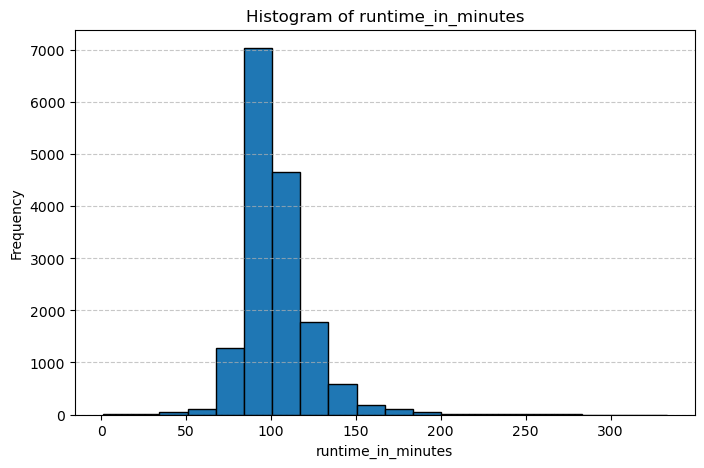

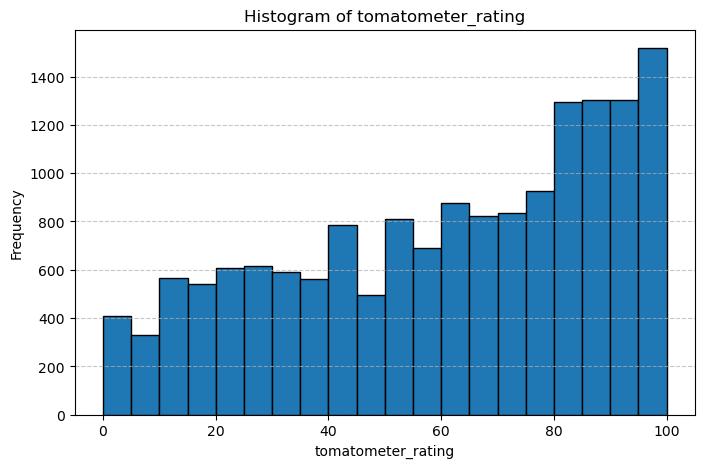

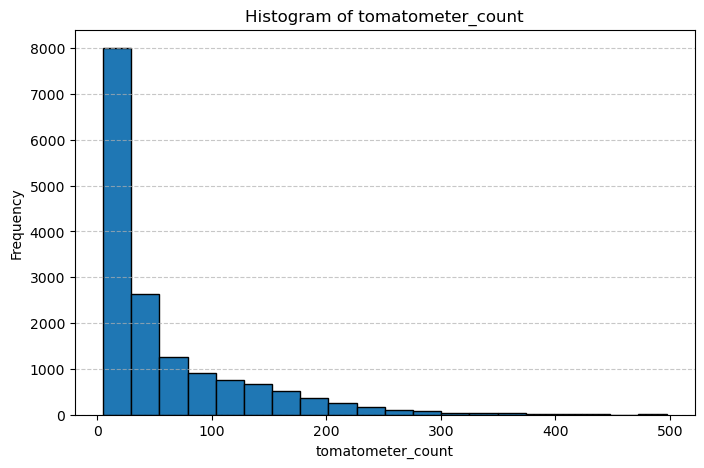

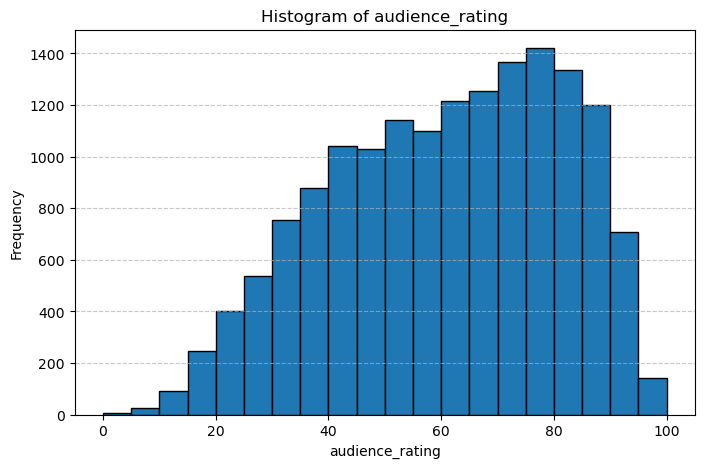

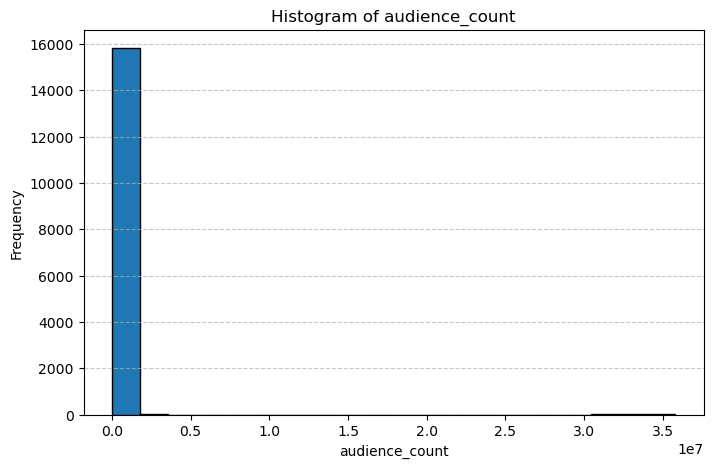

In [63]:
numerical_cols = df_cleaned.select_dtypes(include=['number'])

for col in numerical_cols.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(numerical_cols[col].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

***It is clear that the distribution of most of the data instances in different columns are not normal!***

* tomatometer count, tomaometer rating, and audience rating are all not normally distributed
* audience_count is highly skewed, it seems like a log transformation of this data might be more suitable

### Normality Tests

C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15887.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15887.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15887.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15887.
  res = hypotest_fun_out(*samples, **kwds)


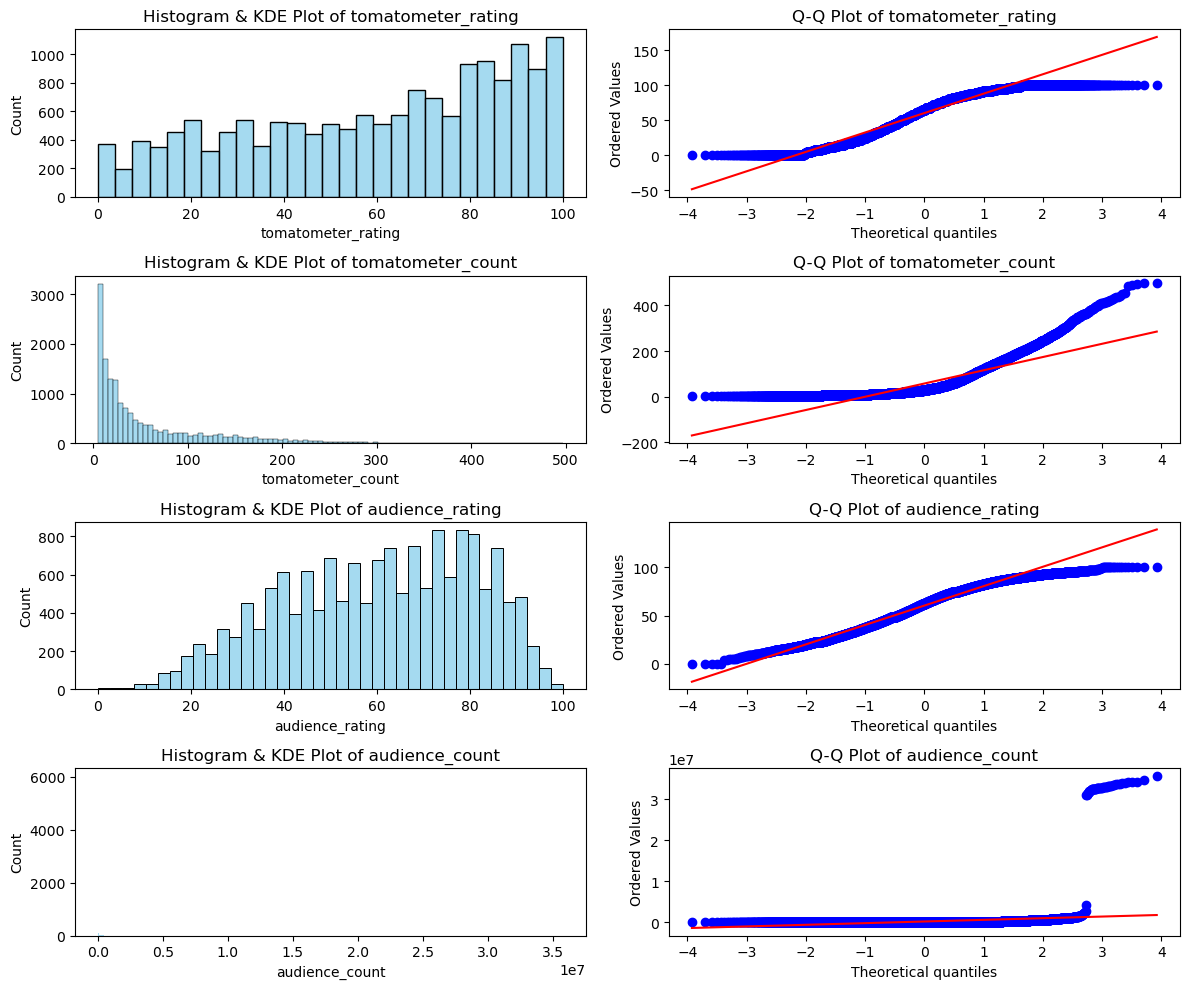

In [67]:
columns_to_test = ["tomatometer_rating", "tomatometer_count","audience_rating","audience_count"]
# Create subplots for visualization
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
# Apply Normality Tests
normality_results = {}
for i, column in enumerate(columns_to_test):
    data = df_cleaned[column].dropna()  # Remove NaN values

    # Histogram & KDE Plot
    sns.histplot(data, kde=False, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"Histogram & KDE Plot of {column}")

    # Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f"Q-Q Plot of {column}")

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = stats.shapiro(data)

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p = stats.kstest(data, 'norm')

    # Anderson-Darling Test
    anderson_result = stats.anderson(data, dist='norm')

    # Skewness & Kurtosis
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)

    # Store results
    normality_results[column] = {
        "Shapiro-Wilk p-value": shapiro_p,
        "Kolmogorov-Smirnov p-value": ks_p,
        "Anderson-Darling Statistic": anderson_result.statistic,
        "Skewness": skewness,
        "Kurtosis": kurtosis
    }

# Adjust layout and show plots
plt.tight_layout()
plt.show()

- ***None of them follow a normal distribution.***
- ***Since the data is not normally distributed, non-parametric tests (like Spearman correlation, Mann-Whitney U, or Kruskal-Wallis) should be preferred over parametric tests that assume normality.***

### Log Transformation on tomatometer_rating

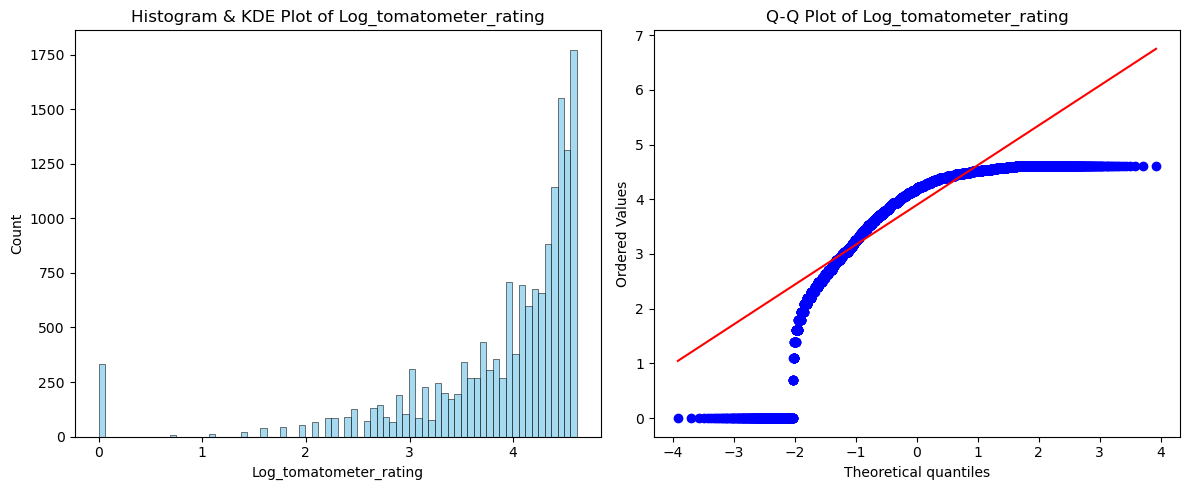

C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15887.
  res = hypotest_fun_out(*samples, **kwds)


In [68]:
# Apply log transformation (adding 1 to avoid log(0) issue)
df_cleaned["Log_tomatometer_rating"] = np.log1p(df_cleaned["tomatometer_rating"])

# Re-run normality tests and visualizations on transformed data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram & KDE Plot for Log_Popularity
sns.histplot(df_cleaned["Log_tomatometer_rating"].dropna(), kde=False, ax=axes[0], color="skyblue")
axes[0].set_title("Histogram & KDE Plot of Log_tomatometer_rating")

# Q-Q Plot for Log_Popularity
stats.probplot(df_cleaned["Log_tomatometer_rating"].dropna(), dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot of Log_tomatometer_rating")

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test on Log_Popularity
shapiro_stat, shapiro_p = stats.shapiro(df_cleaned["Log_tomatometer_rating"].dropna())

# Perform Kolmogorov-Smirnov test on Log_Popularity
ks_stat, ks_p = stats.kstest(df_cleaned["Log_tomatometer_rating"].dropna(), 'norm')

# Perform Anderson-Darling test on Log_Popularity
anderson_result = stats.anderson(df_cleaned["Log_tomatometer_rating"].dropna(), dist='norm')

# Compute skewness & kurtosis for Log_Popularity
log_skewness = stats.skew(df_cleaned["Log_tomatometer_rating"].dropna())
log_kurtosis = stats.kurtosis(df_cleaned["Log_tomatometer_rating"].dropna())

# Store and display results
log_normality_results = pd.DataFrame({
    "Shapiro-Wilk p-value": [shapiro_p],
    "Kolmogorov-Smirnov p-value": [ks_p],
    "Anderson-Darling Statistic": [anderson_result.statistic],
    "Skewness": [log_skewness],
    "Kurtosis": [log_kurtosis]
}, index=["Log_tomatometer_rating"])

### Log Transformation on audience_count

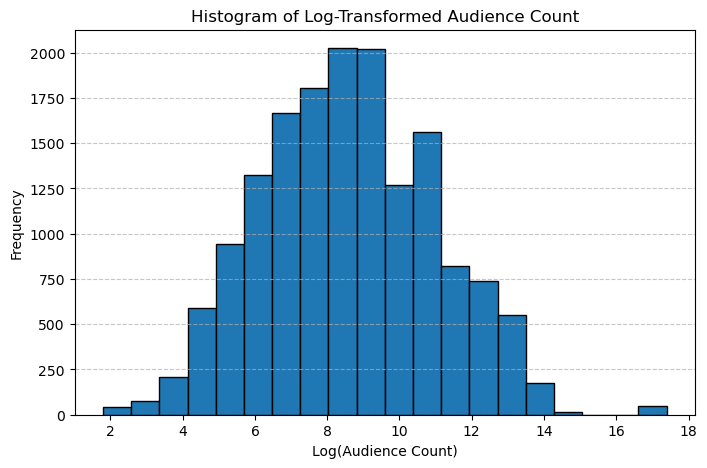

In [69]:
df_cleaned['log_audience_count'] = np.log1p(df_cleaned['audience_count'])

plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['log_audience_count'], bins=20, edgecolor='black')
plt.title('Histogram of Log-Transformed Audience Count')
plt.xlabel('Log(Audience Count)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

***Log transformation significantly improves normality, making it much closer to a normal distribution.
The data is still not perfectly normal, but it is better suited for parametric tests like t-tests and ANOVA.***

#### Summary Pairplot

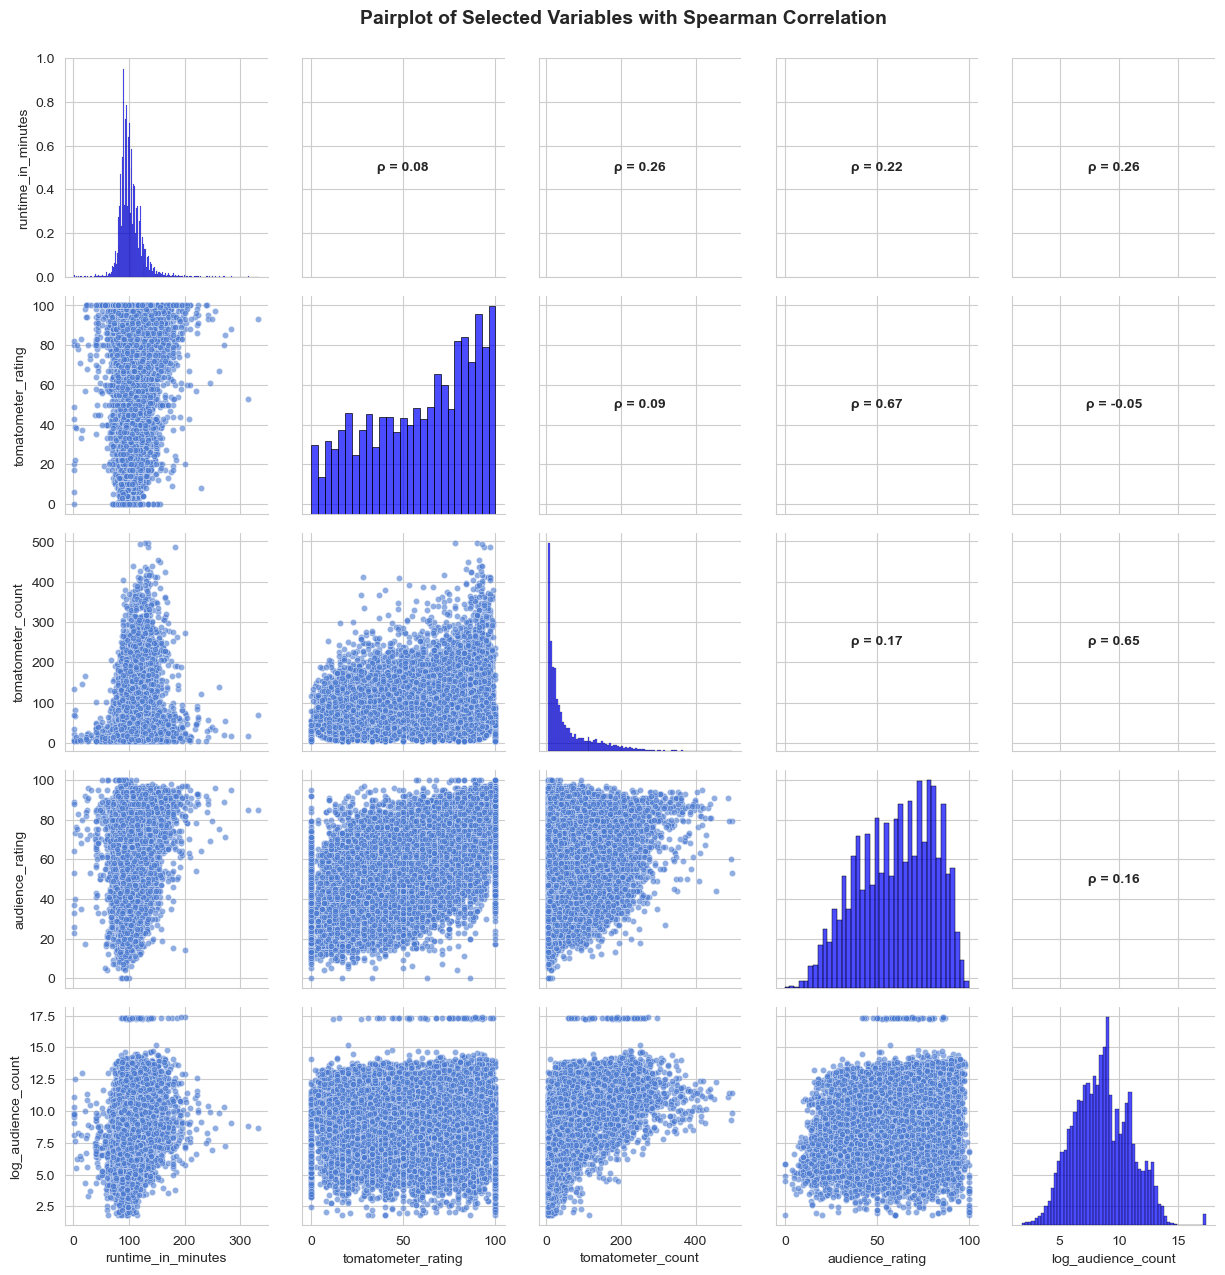

In [70]:
def corrfunc(x, y, **kwargs):
    # Use Spearman's rank correlation (suitable for non-normal data)
    rho, _ = stats.spearmanr(x, y)
    ax = plt.gca()
    ax.annotate(f'ρ = {rho:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=10, fontweight='bold')

numerical_cols_names = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'log_audience_count']
# Set seaborn style for better aesthetics
sns.set_style("whitegrid")
sns.set_palette("muted")
# Create a pairgrid to allow custom annotations
g = sns.PairGrid(df_cleaned[numerical_cols_names], diag_sharey=False, corner=False)
# Lower triangle: Scatterplots
g.map_lower(sns.scatterplot, alpha=0.6, s=20)
# Diagonal: Histograms
g.map_diag(sns.histplot, kde=False, color='blue', edgecolor='black', alpha=0.7)
# Upper triangle: Correlation coefficients
g.map_upper(corrfunc)
# Adjust titles and labels
g.fig.suptitle("Pairplot of Selected Variables with Spearman Correlation", y=1.02, fontsize=14, fontweight='bold')
plt.show()

In [71]:
df_cleaned.head(1)

movie_title rating  \
0  Percy Jackson & the Olympians: The Lightning T...     PG   

                                               genre       directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   

        writers                                               cast  \
0  Craig Titley  Logan Lerman, Brandon T. Jackson, Alexandra Da...   

  in_theaters_date on_streaming_date  runtime_in_minutes       studio_name  \
0       2010-02-12        2010-06-29                83.0  20th Century Fox   

  tomatometer_status  tomatometer_rating  tomatometer_count  audience_rating  \
0             Rotten                  49                144             53.0   

   audience_count  Log_tomatometer_rating  log_audience_count  
0        254287.0                3.912023           12.446223

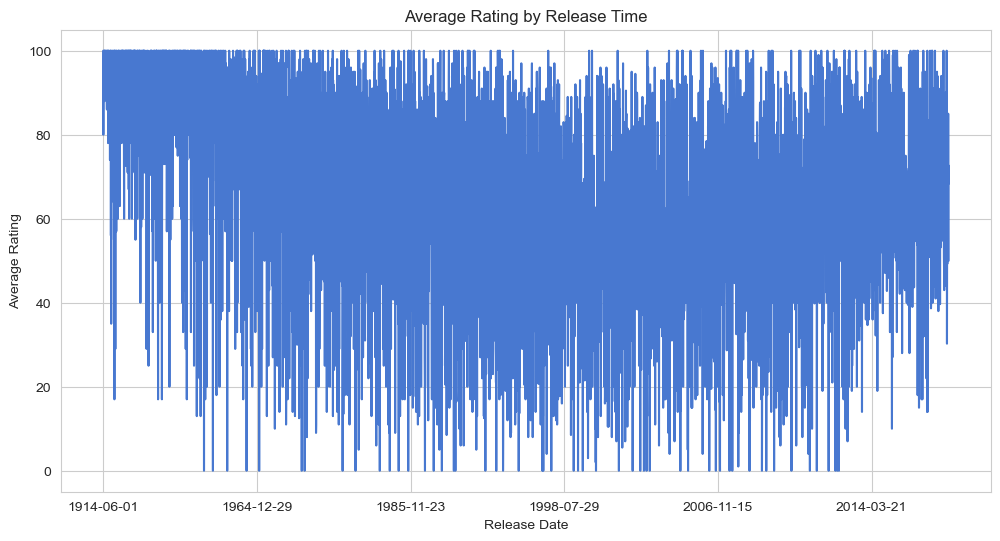

In [73]:
plt.figure(figsize=(12, 6))
years_rating = df_cleaned.groupby('in_theaters_date')['tomatometer_rating'].mean().dropna()
years_rating.plot(kind='line')
plt.title('Average Rating by Release Time')
plt.xlabel('Release Date')
plt.ylabel('Average Rating')
plt.show()

***The interval is too long, so we are going to separate the year from it***

In [74]:
df_cleaned['in_theaters_date'] = pd.to_datetime(df_cleaned['in_theaters_date'])  # Convert to datetime if not already
df_cleaned['year'] = df_cleaned['in_theaters_date'].dt.year  # Extract year
df_cleaned['month'] = df_cleaned['in_theaters_date'].dt.month  # Extract month

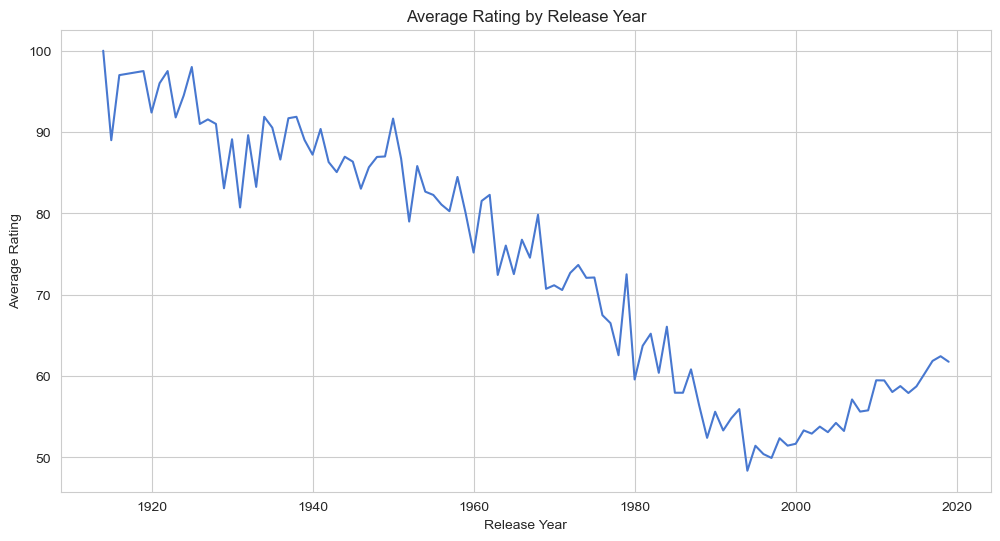

In [76]:
plt.figure(figsize=(12, 6))
years_rating = df_cleaned.groupby('year')['tomatometer_rating'].mean().dropna()
years_rating.plot(kind='line')
plt.title('Average Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()

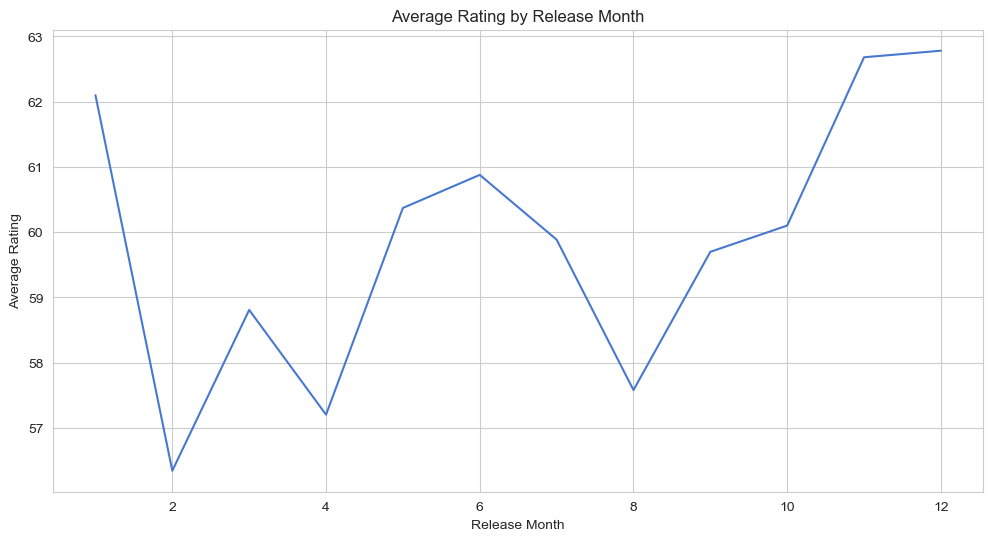

In [77]:
plt.figure(figsize=(12, 6))
years_rating = df_cleaned.groupby('month')['tomatometer_rating'].mean().dropna()
years_rating.plot(kind='line')
plt.title('Average Rating by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Rating')
plt.show()

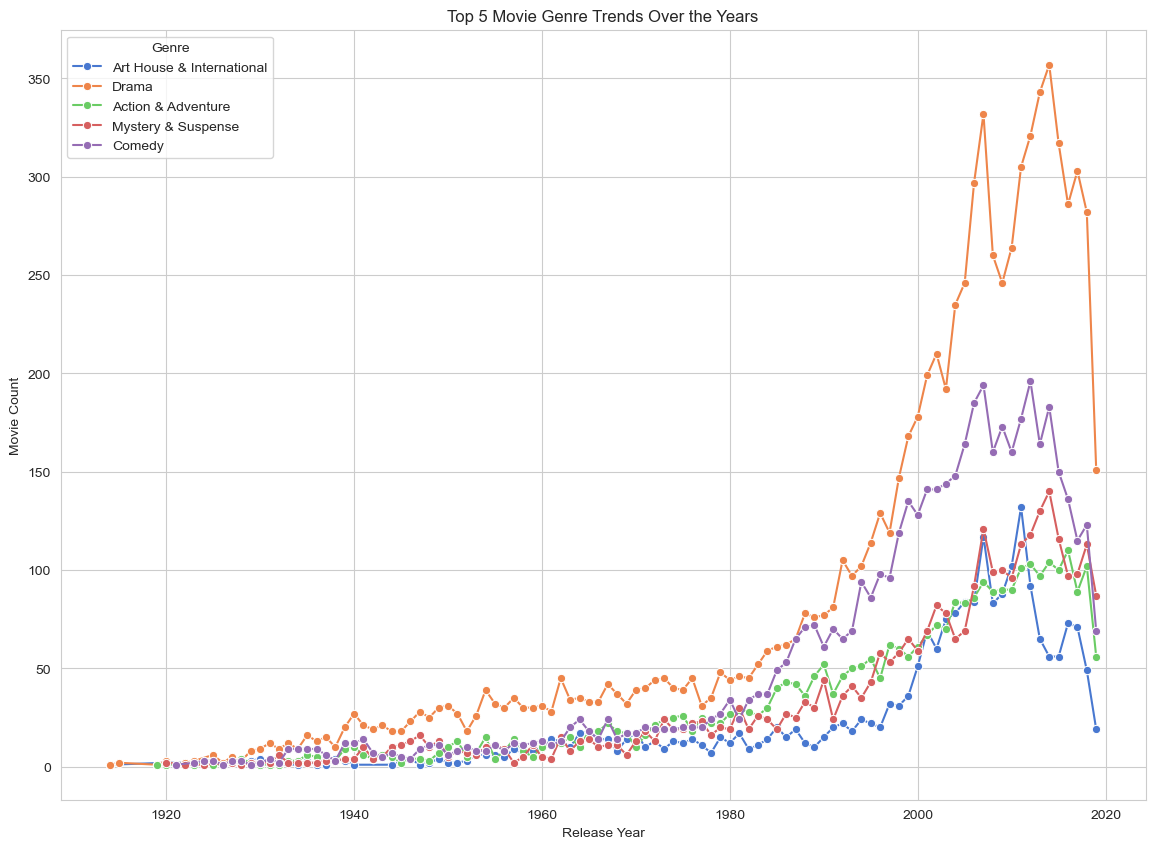

In [81]:
# Step 1: Split the genre strings into lists
df_cleaned['genre'] = df_cleaned['genre'].apply(lambda x: [genre.strip() for genre in x.split(',')] if isinstance(x, str) else x)

# Step 2: Create a list of dictionaries with year and genre pairs
genre_year_data = []
for index, row in df_cleaned.iterrows():
    if isinstance(row['genre'], list):  # Check if genre is a list
        for genre in row['genre']:
            genre_year_data.append({'year': row['year'], 'genre': genre})

# Step 3: Convert to DataFrame and count occurrences
genre_year_df = pd.DataFrame(genre_year_data)
genre_year_counts = genre_year_df.groupby(['year', 'genre']).size().reset_index(name='Movie Count')

# Step 4: Get the top 5 genres by total movie count
top_genres = genre_year_counts.groupby('genre')['Movie Count'].sum().sort_values(ascending=False).head(5).index
filtered_genre_year_counts = genre_year_counts[genre_year_counts['genre'].isin(top_genres)]

# Step 5: Plot the trends
plt.figure(figsize=(14, 10))
sns.lineplot(data=filtered_genre_year_counts, x='year', y='Movie Count', hue='genre', marker='o')
plt.title('Top 5 Movie Genre Trends Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Movie Count')
plt.legend(title='Genre')
plt.grid(True)
plt.show()

In [82]:
df_cleaned.head(1)

movie_title rating  \
0  Percy Jackson & the Olympians: The Lightning T...     PG   

                                               genre       directors  \
0  [Action & Adventure, Comedy, Drama, Science Fi...  Chris Columbus   

        writers                                               cast  \
0  Craig Titley  Logan Lerman, Brandon T. Jackson, Alexandra Da...   

  in_theaters_date on_streaming_date  runtime_in_minutes       studio_name  \
0       2010-02-12        2010-06-29                83.0  20th Century Fox   

  tomatometer_status  tomatometer_rating  tomatometer_count  audience_rating  \
0             Rotten                  49                144             53.0   

   audience_count  Log_tomatometer_rating  log_audience_count    year  month  
0        254287.0                3.912023           12.446223  2010.0    2.0

In [85]:
#df_exploded = df_cleaned.explode("directors")
director_movie_counts = df_cleaned["directors"].value_counts()
director_movie_counts_df = director_movie_counts.reset_index()
director_movie_counts_df.columns = ["directors", "Number of Movies"]

In [87]:
director_movie_counts_df

directors  Number of Movies
0                         Alfred Hitchcock                36
1                              Woody Allen                36
2                           Clint Eastwood                35
3                         Steven Spielberg                32
4                             Sidney Lumet                30
...                                    ...               ...
7906                         David Barrett                 1
7907                          Stevan Riley                 1
7908                           David Green                 1
7909                       Gianfranco Rosi                 1
7910  Byron Howard, Rich Moore, Jared Bush                 1

[7911 rows x 2 columns]

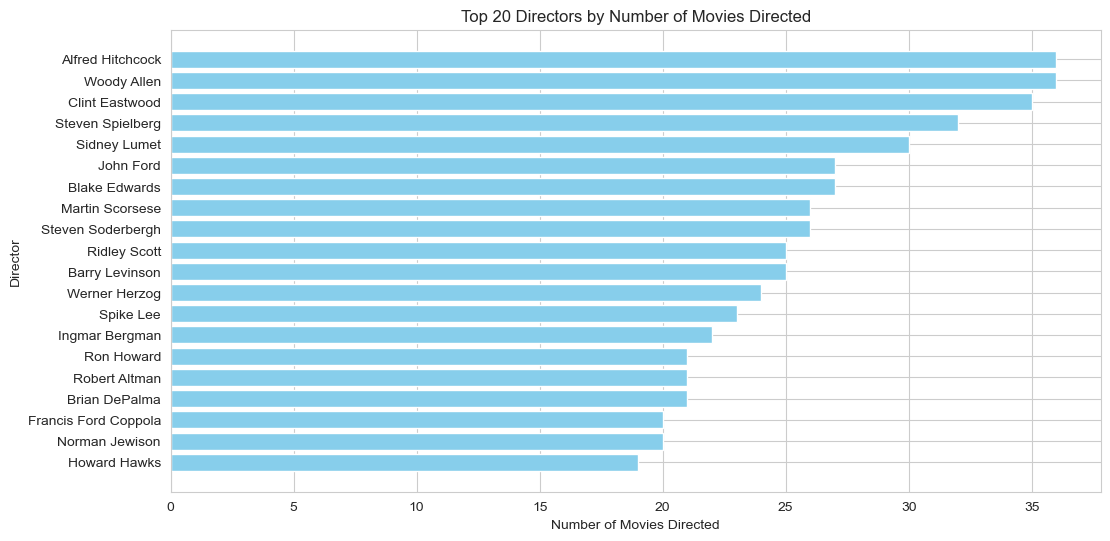

In [88]:
top_directors_df = director_movie_counts_df.head(20)
plt.figure(figsize=(12, 6))
plt.barh(top_directors_df["directors"], top_directors_df["Number of Movies"], color='skyblue')
plt.xlabel("Number of Movies Directed")
plt.ylabel("Director")
plt.title("Top 20 Directors by Number of Movies Directed")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

***The below plot needs adjustments! It also considers directors with one movie produced***

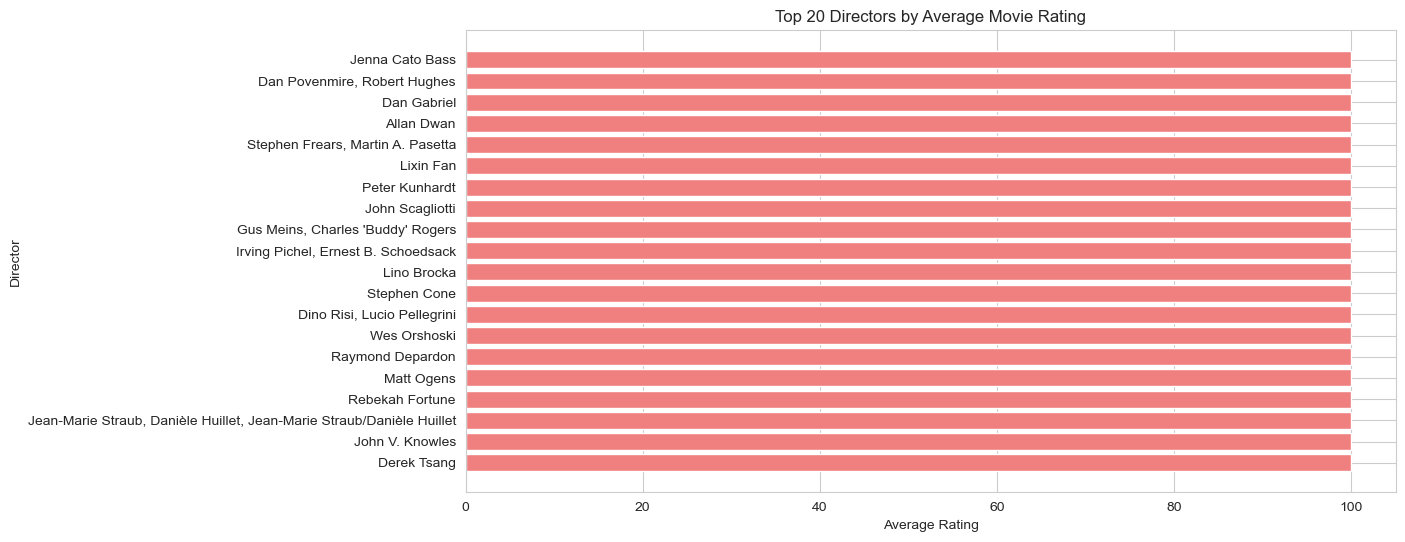

In [90]:
average_rating_per_director = df_cleaned.groupby("directors")["tomatometer_rating"].mean().sort_values(ascending=False)
average_rating_df = average_rating_per_director.reset_index()
average_rating_df.columns = ["directors", "average rating"]
top_avg_rating_df = average_rating_df.head(20)
plt.figure(figsize=(12, 6))
plt.barh(top_avg_rating_df["directors"], top_avg_rating_df["average rating"], color='lightcoral')
plt.xlabel("Average Rating")
plt.ylabel("Director")
plt.title("Top 20 Directors by Average Movie Rating")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

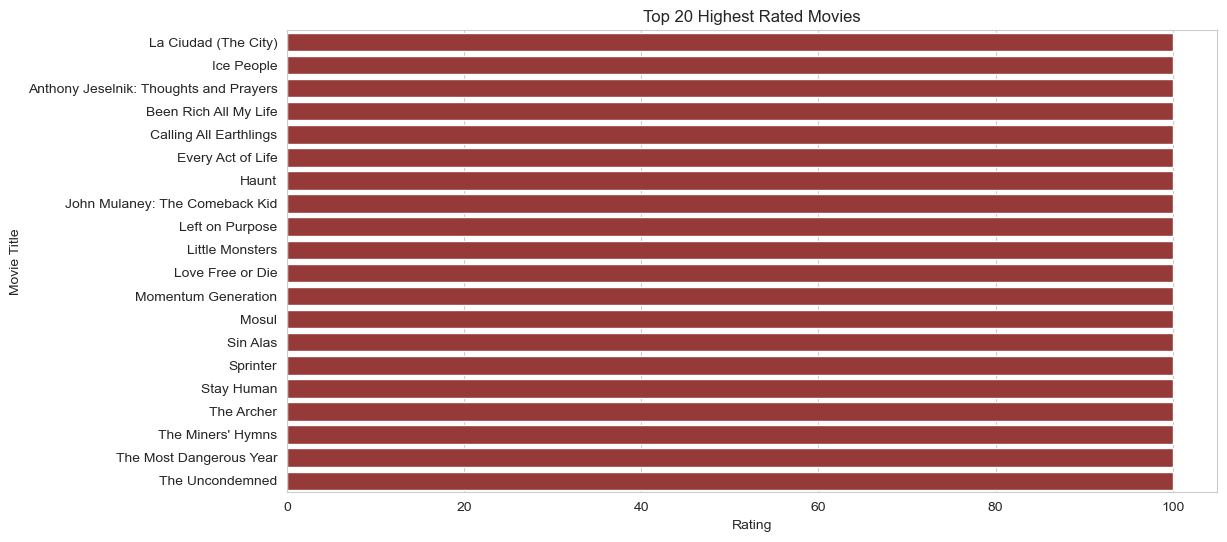

In [98]:
top_20_highest_rated = df_cleaned.nlargest(20, 'audience_rating')
plt.figure(figsize=(12, 6))
sns.barplot(x='audience_rating', y='movie_title', data=top_20_highest_rated, color='brown')
plt.title('Top 20 Highest Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.show()

#### Since there exist many movies with the rating of 100, all of them are with same rating!

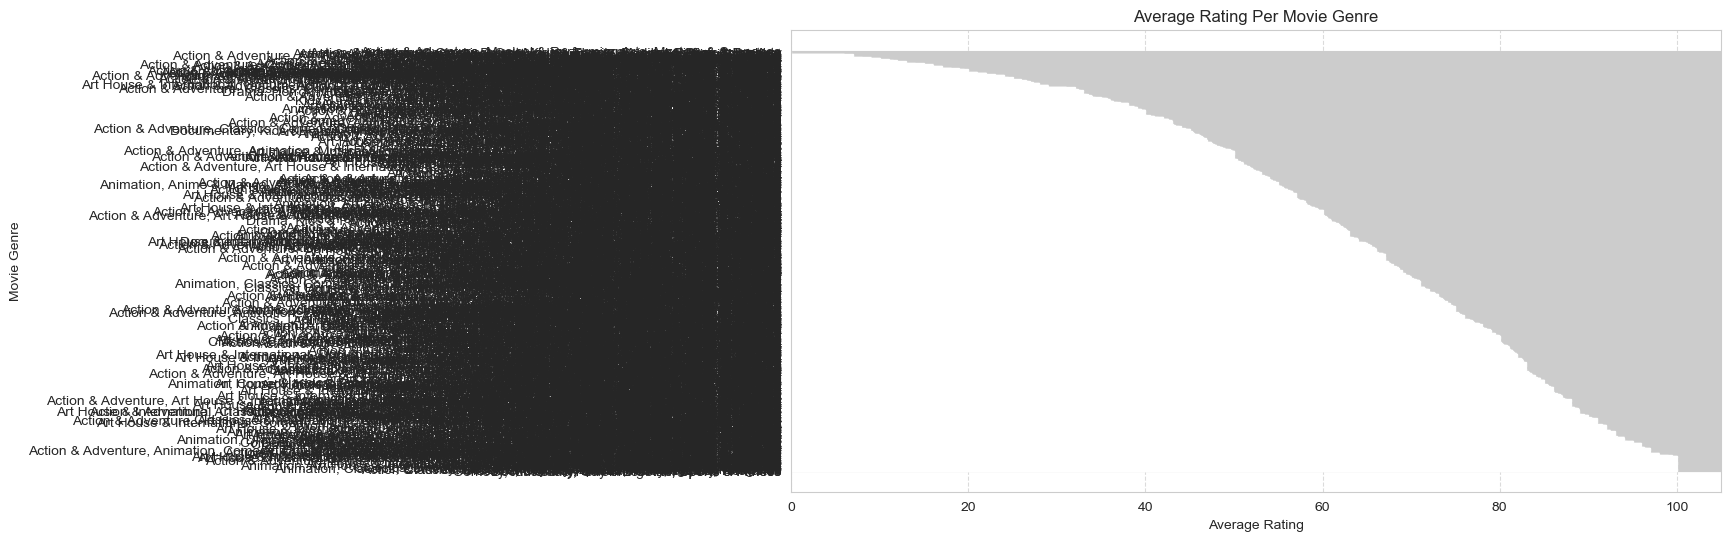

In [100]:
df_cleaned['tomatometer_rating'] = pd.to_numeric(df_cleaned['tomatometer_rating'], errors='coerce')
df_cleaned['genre'] = df_cleaned['genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
#df_cleaned['genre'] = df_cleaned['genre'].apply(lambda x: [genre.strip() for genre in x.split(',')] if isinstance(x, str) else x)
df_exploded = df.explode('genre')
genre_avg_score = df_exploded.groupby('genre')['tomatometer_rating'].mean().reset_index()
genre_avg_score = genre_avg_score.sort_values(by='tomatometer_rating', ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(genre_avg_score['genre'], genre_avg_score['tomatometer_rating'], color='skyblue')
plt.xlabel("Average Rating")
plt.ylabel("Movie Genre")
plt.title("Average Rating Per Movie Genre")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

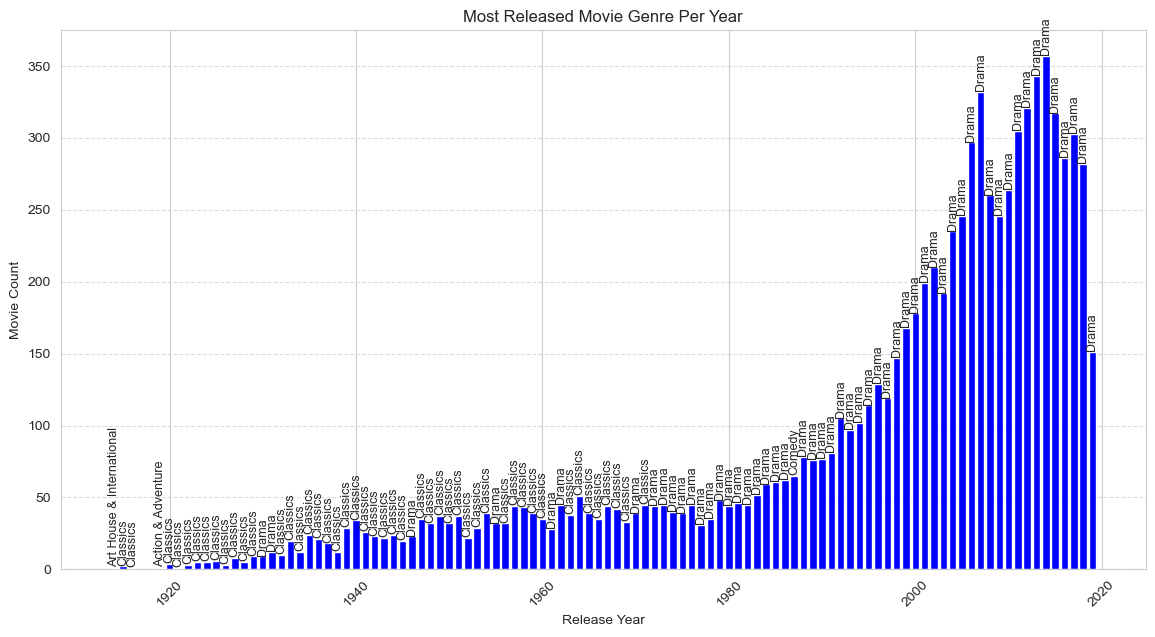

In [104]:
#df_cleaned['year'] = df_cleaned['year'].astype(int)
df_cleaned['genre'] = df_cleaned['genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded = df_cleaned.explode('genre')
genre_year_counts = df_exploded.groupby(['year', 'genre']).size().reset_index(name='Movie Count')
max_genre_per_year = genre_year_counts.loc[genre_year_counts.groupby('year')['Movie Count'].idxmax()]
plt.figure(figsize=(14, 7))
plt.bar(max_genre_per_year['year'], max_genre_per_year['Movie Count'], color='b')
for i in range(len(max_genre_per_year)):
    year = max_genre_per_year['year'].iloc[i]
    count = max_genre_per_year['Movie Count'].iloc[i]
    genre = max_genre_per_year['genre'].iloc[i]
    plt.text(year, count + 0.5, genre, fontsize=9, verticalalignment='bottom', horizontalalignment='center', rotation=90)

plt.xlabel("Release Year")
plt.ylabel("Movie Count")
plt.title("Most Released Movie Genre Per Year")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Categorical Data

First going to produce generic bar graphs for each category and from there decide what further visualistions might be appropriate. 

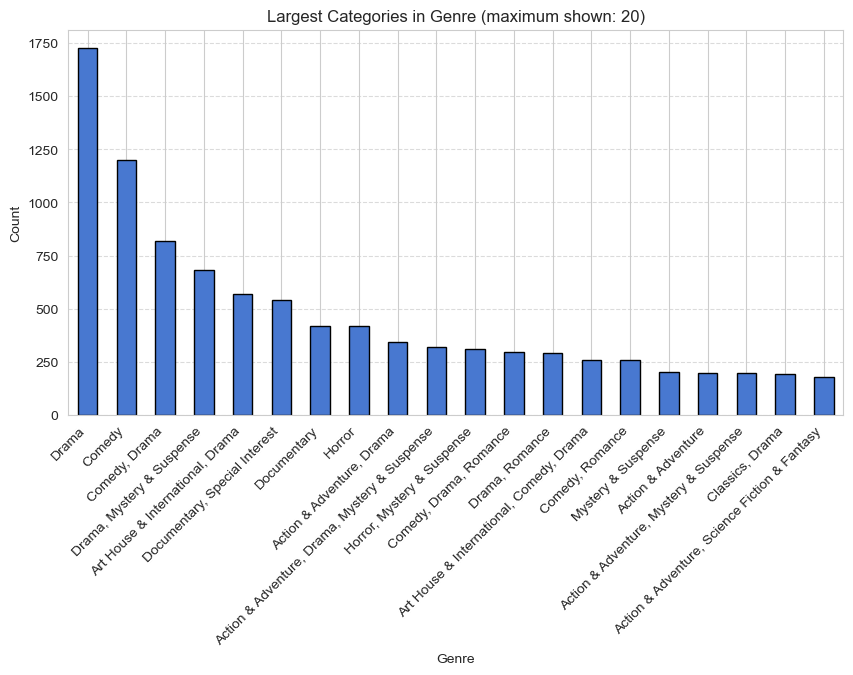

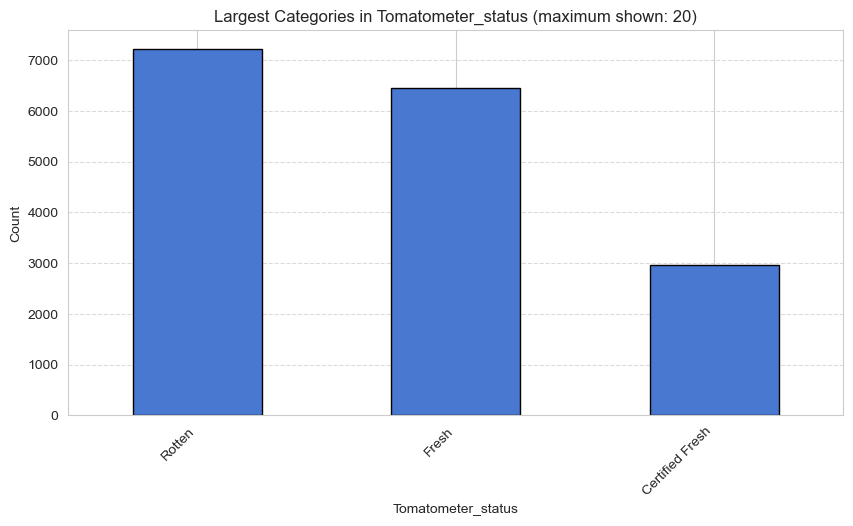

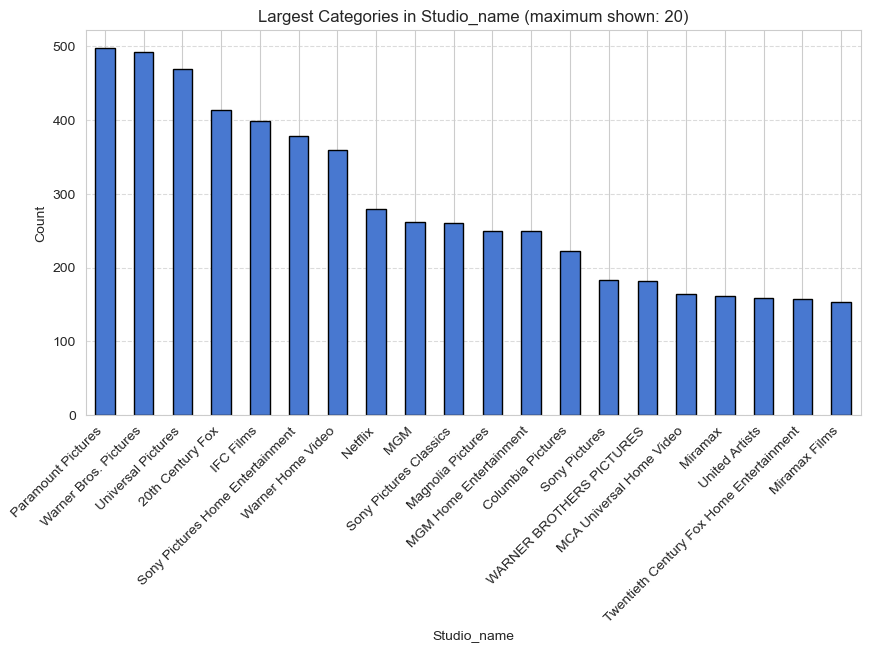

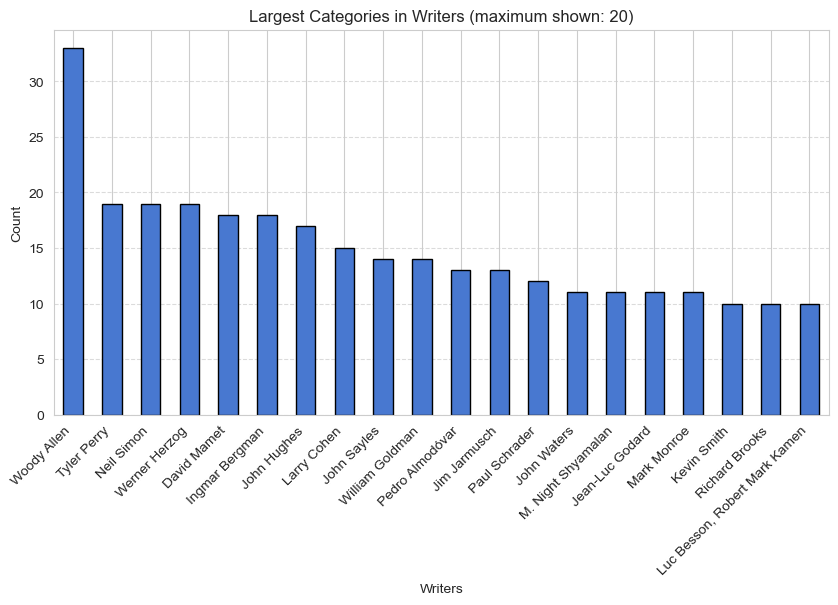

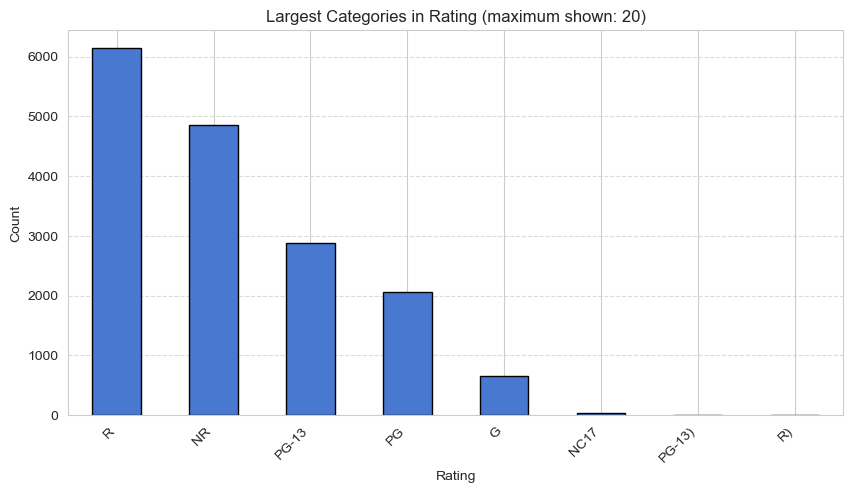

In [105]:
selected_categorical_cols = ['genre', 'tomatometer_status', 'studio_name', 'writers', 'rating']

# Set a limit for top categories
top_n = 20  

# Create bar plots for each selected categorical column
for col in selected_categorical_cols:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().nlargest(top_n).plot(kind='bar', edgecolor='black')
    plt.title(f'Largest Categories in {col.capitalize()} (maximum shown: {top_n})')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

An idea of frequency would be useful for many of these columns: we hypothesise that the frequency distributions are skewed with only a few studios, directors, and writers produce the majority of films.

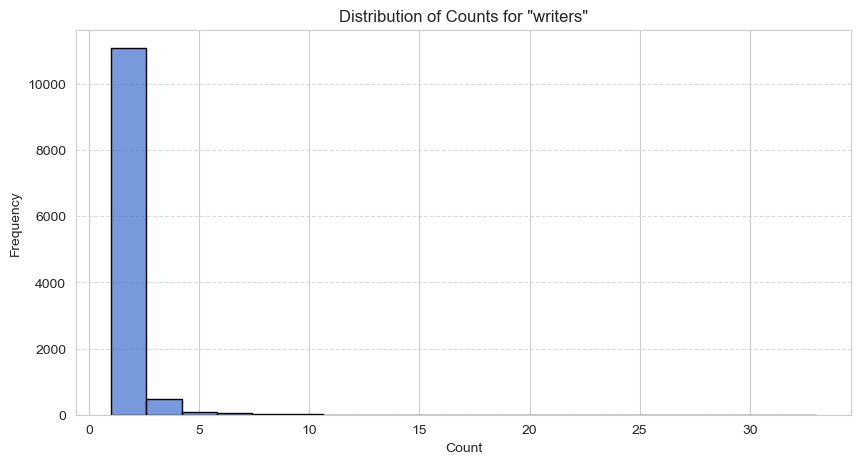

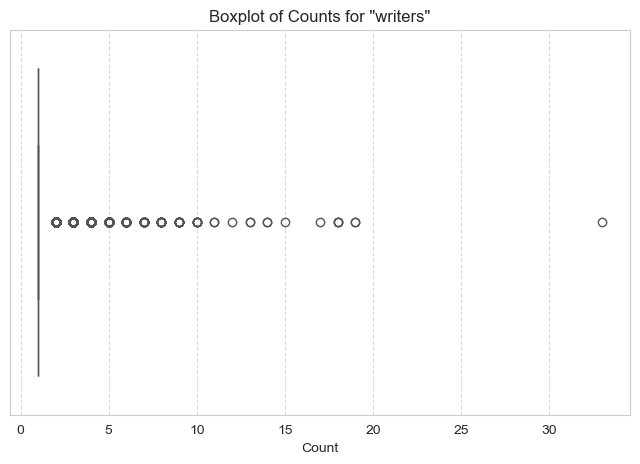

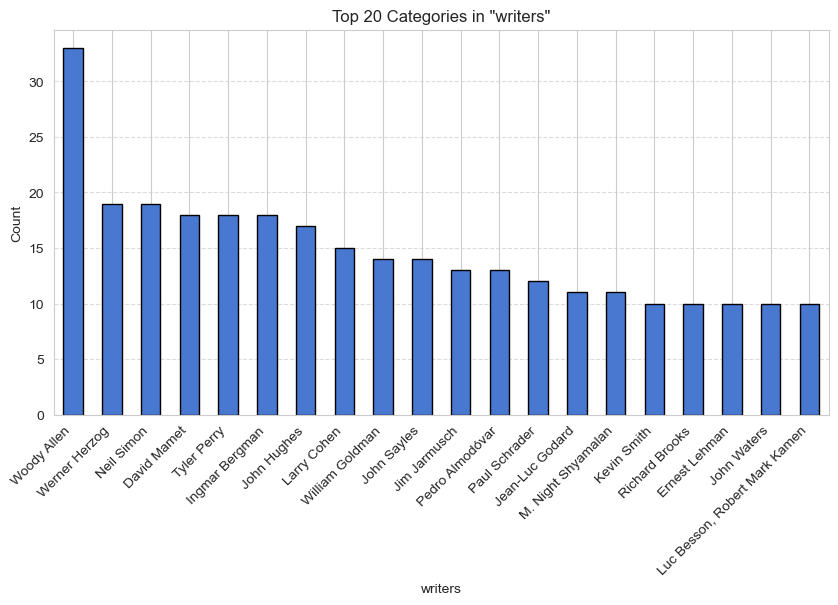

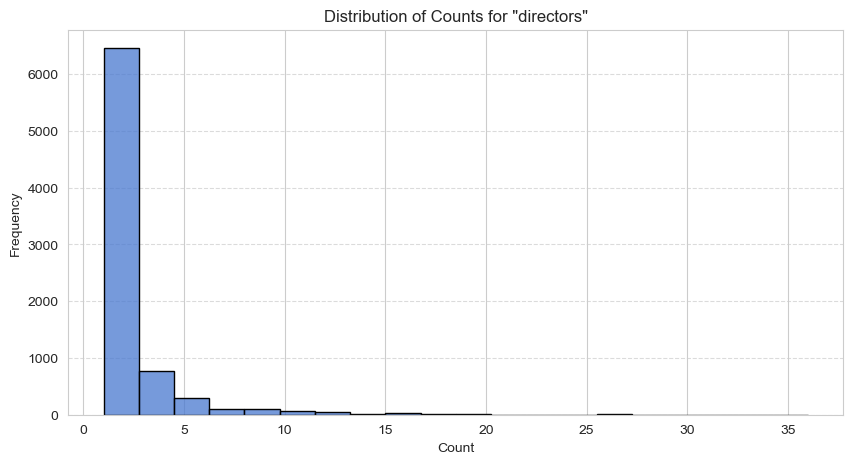

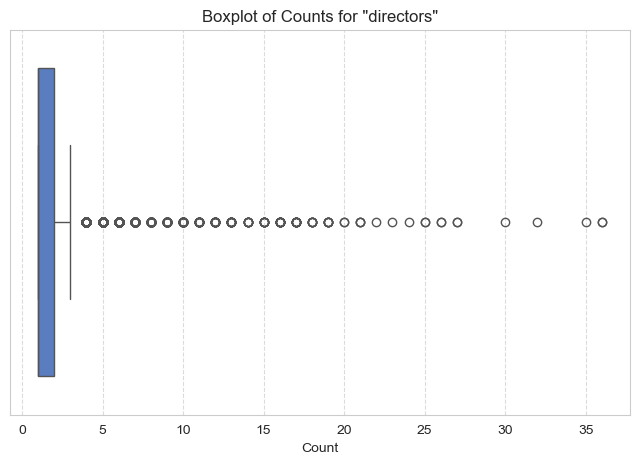

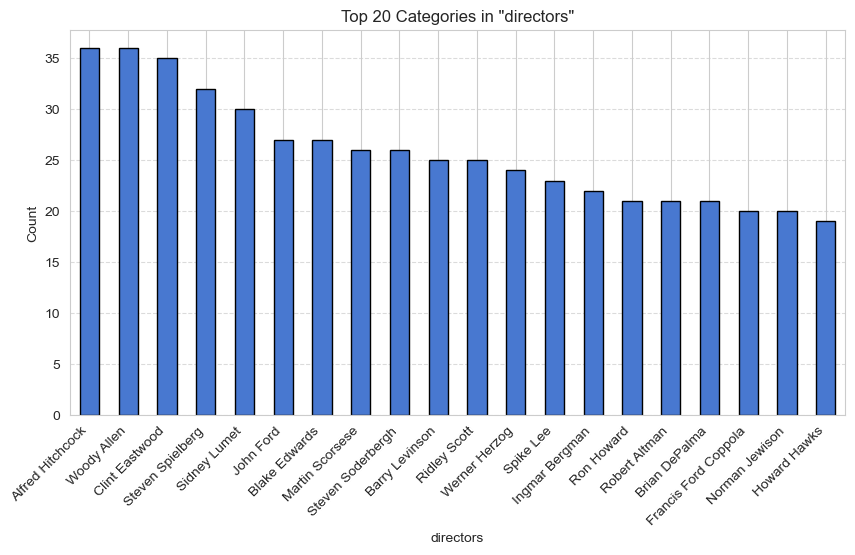

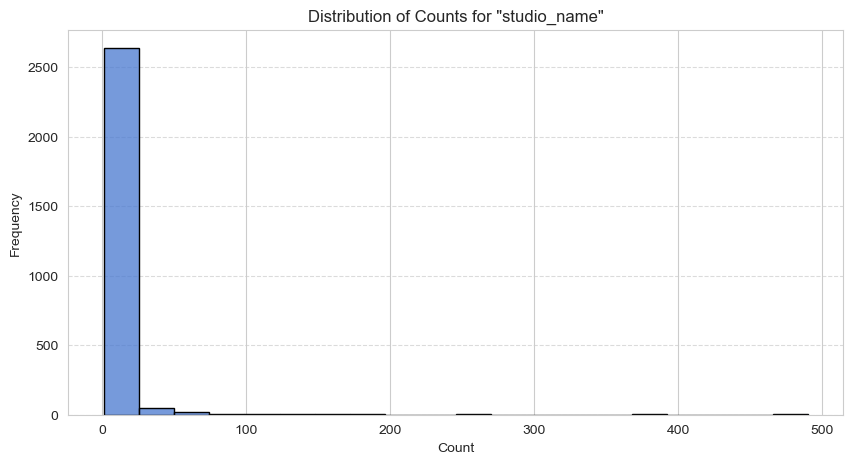

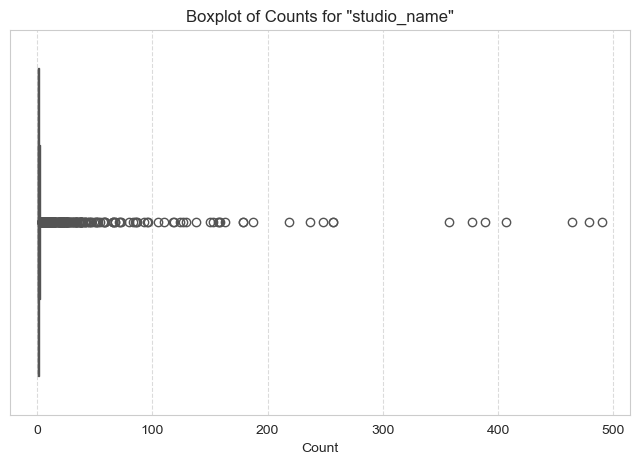

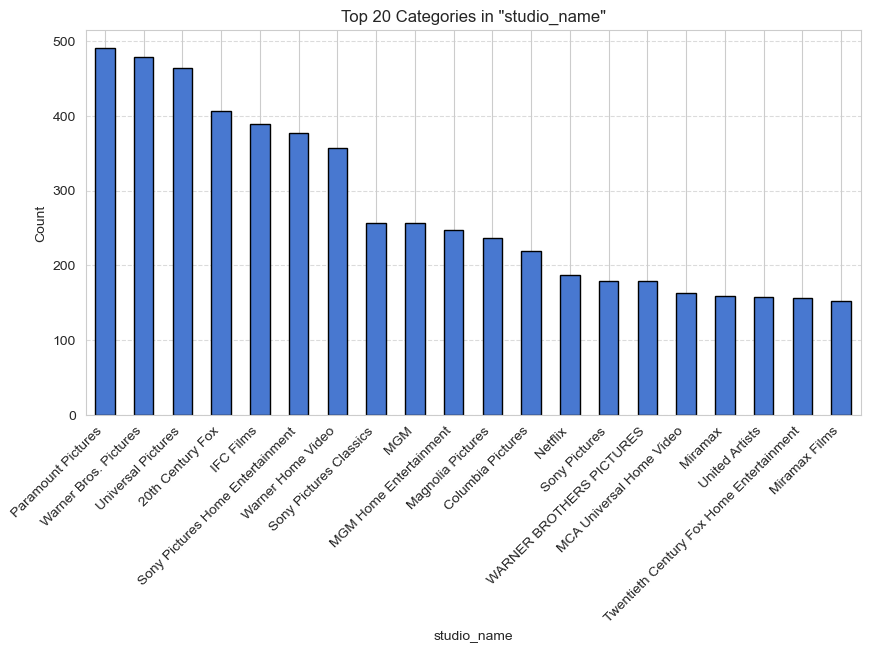

In [106]:
def plot_count_distribution(df, column, top_n=20, bins=20):
    """
    Plots the distribution of counts for a given categorical column.
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - column: str, the name of the categorical column to analyze.
    - top_n: int, number of top categories to display in the bar chart (default is 20).
    - bins: int, number of bins for the histogram (default is 20).
    """
    # Count occurrences for each category in the column
    counts = df_cleaned[column].value_counts()
    
    # Plot histogram of counts with KDE curve
    plt.figure(figsize=(10, 5))
    sns.histplot(counts, bins=bins, kde=False, edgecolor='black')
    plt.title(f'Distribution of Counts for "{column}"')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Plot boxplot for counts
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=counts)
    plt.title(f'Boxplot of Counts for "{column}"')
    plt.xlabel('Count')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

    # Plot bar chart for the top N categories
    plt.figure(figsize=(10, 5))
    counts.nlargest(top_n).sort_values(ascending=False).plot(kind='bar', edgecolor='black')
    plt.title(f'Top {top_n} Categories in "{column}"')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot for writers
plot_count_distribution(df_cleaned, column='writers', top_n=20)
# Plot for directors
plot_count_distribution(df_cleaned, column='directors', top_n=20)
# Plot for directors
plot_count_distribution(df_cleaned, column='studio_name', top_n=20)

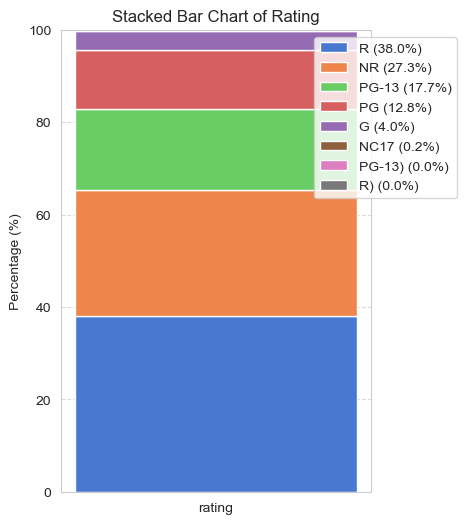

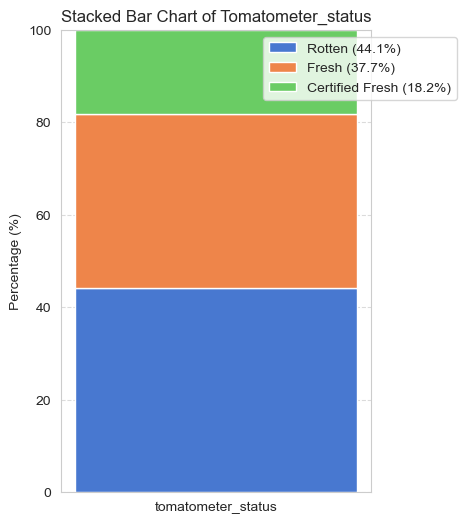

In [107]:
def plot_single_stacked_bar(df, column):
    """
    Creates a single stacked bar chart for a given categorical column.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column: str, column name to visualize.
    """
    category_counts = df[column].value_counts(normalize=True) * 100  

    # Create figure
    plt.figure(figsize=(4,6))
    
    # Initialize bottom position
    bottom = 0  
    
    # Iterate through categories and stack them
    for category, value in category_counts.items():
        plt.bar(column, value, bottom=bottom, label=f"{category} ({value:.1f}%)")
        bottom += value  # Update bottom position

    # Formatting
    plt.title(f"Stacked Bar Chart of {column.capitalize()}")
    plt.ylabel("Percentage (%)")
    plt.ylim(0, 100)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Place legend outside
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Show plot
    plt.show()

# Plot stacked bar charts for 'rating' and 'tomatometer_status'
plot_single_stacked_bar(df_cleaned, 'rating')
plot_single_stacked_bar(df_cleaned, 'tomatometer_status')

Next, we will work on the genre column. Here the genres are in a list format. We will take two appraoches to this data.
1. We will expand the columns to look at the distribution of all categories and seeing which genres occur most commonly together.
2. We will introduce a reduced columns wich only holds the primary (first-listed) genre for each film. This will allow us to use genre in the later analysis without duplicating data.

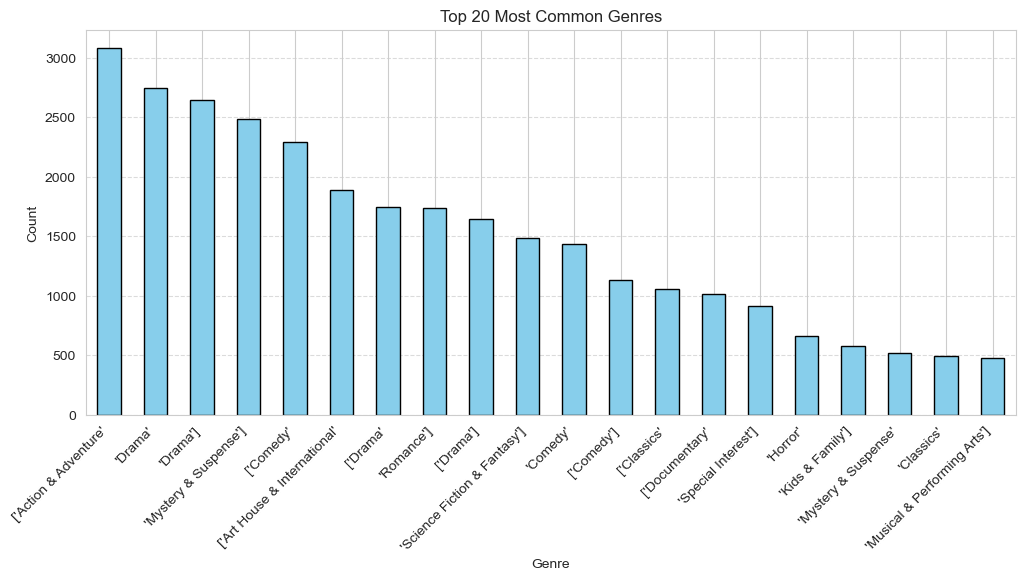

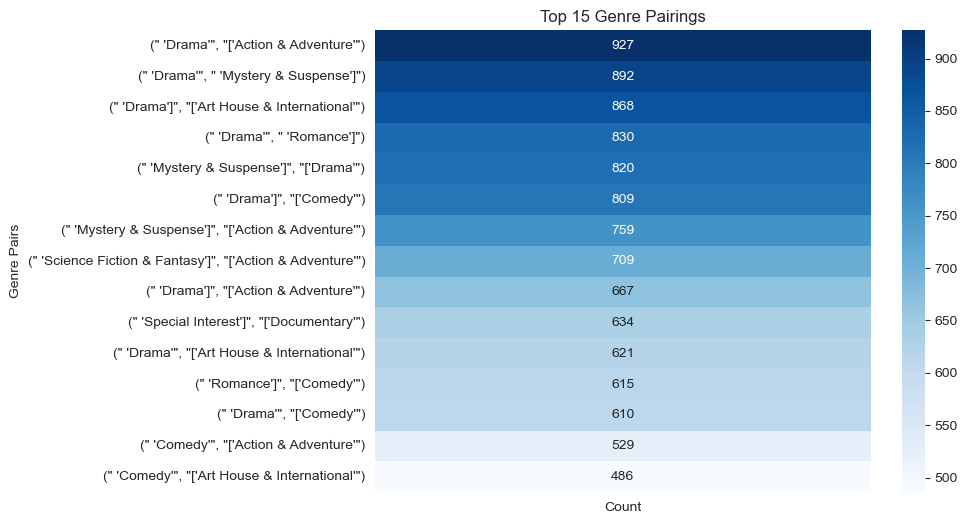

In [108]:
from itertools import combinations

### --- Approach 1: Expanding Genres ---
# Convert genre column into lists (assuming genres are separated by ',')
df_cleaned['genre_list'] = df_cleaned['genre'].astype(str).apply(lambda x: x.split(','))

# Flatten the genre lists to count occurrences
all_genres = [genre.strip() for sublist in df_cleaned['genre_list'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

# Plot genre frequency
plt.figure(figsize=(12, 5))
genre_counts.head(20).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 20 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Genre Co-occurrence ---
genre_combinations = []
for genres in df_cleaned['genre_list']:
    genre_combinations.extend(combinations(sorted(genres), 2))  # Get all pairs of genres

# Count occurrences of genre pairs
pair_counts = pd.DataFrame(Counter(genre_combinations).most_common(), columns=['Genre Pair', 'Count'])
pair_counts['Count'] = pd.to_numeric(pair_counts['Count'], errors='coerce')

# Plot heatmap of most common genre pairs
top_pairs = pair_counts.nlargest(15, 'Count')
top_pairs.set_index('Genre Pair', inplace=True)

plt.figure(figsize=(8, 6))
sns.heatmap(top_pairs, annot=True, cmap="Blues", fmt="d")
plt.title("Top 15 Genre Pairings")
plt.ylabel("Genre Pairs")
plt.show()

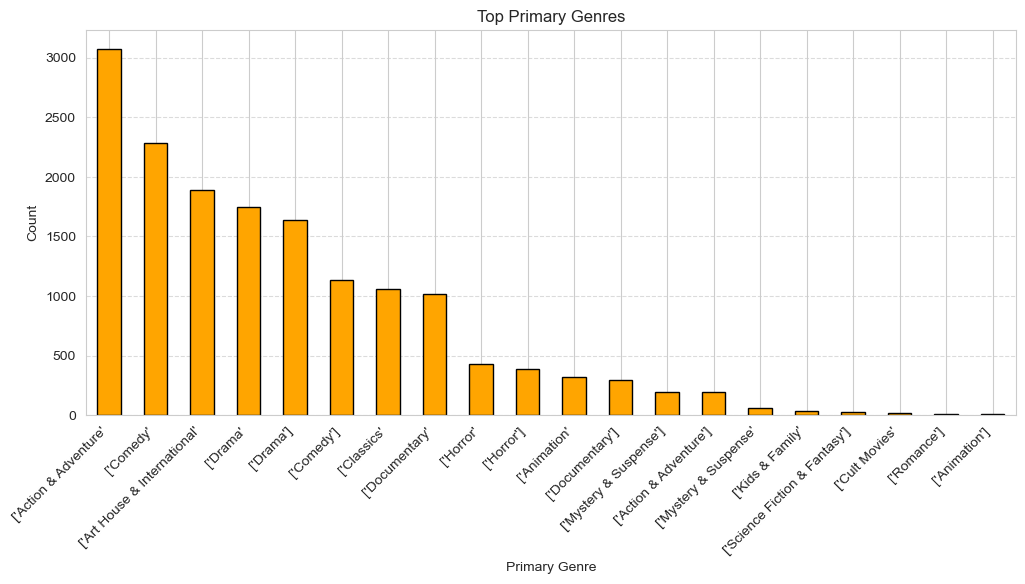

movie_title rating  \
0  Percy Jackson & the Olympians: The Lightning T...     PG   
1                                        Please Give      R   

                                               genre          directors  \
0  [Action & Adventure, Comedy, Drama, Science Fi...     Chris Columbus   
1                                           [Comedy]  Nicole Holofcener   

             writers                                               cast  \
0       Craig Titley  Logan Lerman, Brandon T. Jackson, Alexandra Da...   
1  Nicole Holofcener  Catherine Keener, Amanda Peet, Oliver Platt, R...   

  in_theaters_date on_streaming_date  runtime_in_minutes  \
0       2010-02-12        2010-06-29                83.0   
1       2010-04-30        2010-10-19                90.0   

              studio_name  ... tomatometer_rating  tomatometer_count  \
0        20th Century Fox  ...                 49                144   
1  Sony Pictures Classics  ...                 86                140   

   audience_rating  audience_count  Log_tomatometer_rating  \
0             53.0        254287.0                3.912023   
1             64.0         11567.0                4.465908   

   log_audience_count    year  month  \
0           12.446223  2010.0    2.0   
1            9.355998  2010.0    4.0   

                                          genre_list          primary_genre  
0  [['Action & Adventure',  'Comedy',  'Drama',  ...  ['Action & Adventure'  
1                                       [['Comedy']]             ['Comedy']  

[2 rows x 21 columns]

In [110]:
### Approach 2: Primary Genre Extraction ---
df_cleaned['primary_genre'] = df_cleaned['genre_list'].apply(lambda x: x[0].strip() if isinstance(x, list) and len(x) > 0 else None)
# Check distribution of primary genres
plt.figure(figsize=(12, 5))
df_cleaned['primary_genre'].value_counts().head(20).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top Primary Genres')
plt.xlabel('Primary Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
df_cleaned.head(2)

### Principal Component Analysis (PCA)

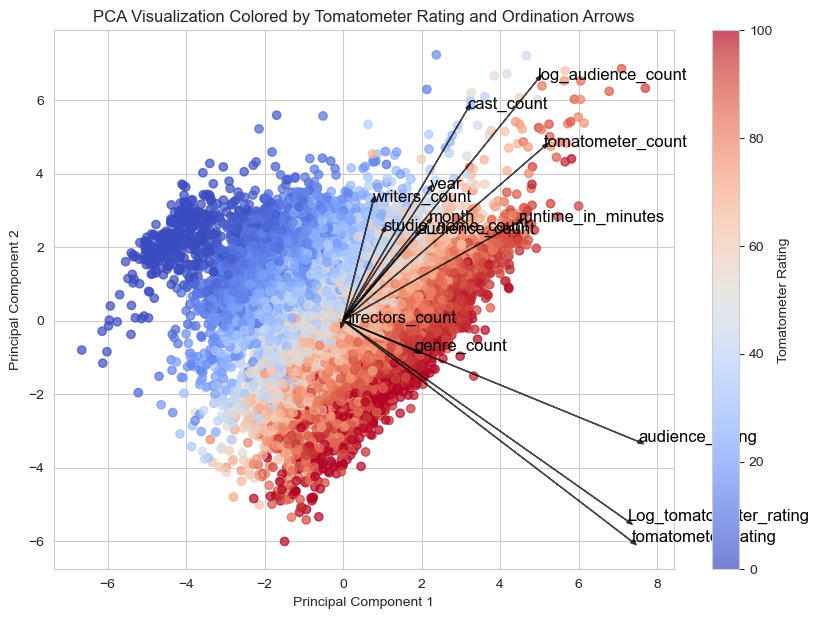

In [111]:
# Convert 'in_theaters_date' to year
if 'in_theaters_date' in df_cleaned.columns:
    df['release_year'] = pd.to_datetime(df['in_theaters_date'], errors='coerce').dt.year

# Drop unnecessary columns
dataframe = df_cleaned.drop(columns=['movie_title', 'movie_info', 'critics_consensus', 'on_streaming_date', 'in_theaters_date'], errors='ignore')

"""this is not the ideal way to do this, would rather explode along these columns to get representation of the groups but this is working for now"""
# Function to safely convert string representations of lists into list counts 
def list_length(value):
    if isinstance(value, str):
        return len(value.split(','))  # Count items separated by commas
    elif isinstance(value, list):
        return len(value)
    return 0

# Apply function to relevant columns to replace with counts
for col in ['genre', 'directors', 'writers', 'cast', 'studio_name']:
    if col in dataframe.columns:
        dataframe[col + '_count'] = dataframe[col].apply(list_length)

# Drop original text columns after conversion
dataframe = dataframe.drop(columns=['genre', 'directors', 'writers', 'cast', 'studio_name'], errors='ignore')

# Include release year in PCA
if 'release_year' in dataframe.columns:
    dataframe['release_year'] = pd.to_numeric(dataframe['release_year'], errors='coerce')

# Drop any remaining non-numeric columns
dataframe = dataframe.select_dtypes(include=['number'])

# Fill missing values with 0 to ensure no NaNs remain
dataframe = dataframe.fillna(0)

# Standardizing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataframe)

# PCA transformation
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['OriginalIndex'] = dataframe.index

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Ensure 'tomatometer_rating' is numeric
if 'tomatometer_rating' in dataframe.columns:
    pca_df['tomatometer_rating'] = dataframe['tomatometer_rating'].values  # Add ratings back to PCA results

# Plot PCA with color based on Tomatometer rating
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['tomatometer_rating'], cmap='coolwarm', alpha=0.7)

for i, col in enumerate(dataframe.select_dtypes(include=[np.number]).columns):
    plt.arrow(0, 0, loadings[i, 0] * 10, loadings[i, 1] * 10, color='black', alpha=0.7, head_width=0.1)
    plt.text(loadings[i, 0] *10, loadings[i, 1] * 10, col, color='black', fontsize=12)

plt.colorbar(scatter, label='Tomatometer Rating')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization Colored by Tomatometer Rating and Ordination Arrows')
plt.show()

In [112]:
# Checking the explained variance
explained_variance = pca.explained_variance_ratio_
variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})
variance_df

Principal Component  Explained Variance
0                 PC1            0.187082
1                 PC2            0.160610

This shows that many of our variables are correlated, as the ordinations point in the same direction. The tomatometer rating seems to be correlated with the number of genres, the number of directors and runtime in minutes. 

the PC1 axis is roughly runtime/rating, wehreas the PC2 seems to be the size of the audience. The first compnent explains 58.6% of the variance in the data, the PC2 12%.

I have rerun the code and this is now explaining less variance. Maybe this is to do with the data cleaning I have done? Not sure.

Below is the PCA with some categories one hot encoded, e.g. rating and primary genre. 

Shape of df_categorical_encoded: (15887, 37)
Feature Names from OneHotEncoder: ["primary_genre_['Action & Adventure'"
 "primary_genre_['Action & Adventure']" "primary_genre_['Animation'"
 "primary_genre_['Animation']"
 "primary_genre_['Art House & International'"
 "primary_genre_['Art House & International']" "primary_genre_['Classics'"
 "primary_genre_['Classics']" "primary_genre_['Comedy'"
 "primary_genre_['Comedy']" "primary_genre_['Cult Movies'"
 "primary_genre_['Documentary'" "primary_genre_['Documentary']"
 "primary_genre_['Drama'" "primary_genre_['Drama']"
 "primary_genre_['Horror'" "primary_genre_['Horror']"
 "primary_genre_['Kids & Family'" "primary_genre_['Kids & Family']"
 "primary_genre_['Musical & Performing Arts'"
 "primary_genre_['Musical & Performing Arts']"
 "primary_genre_['Mystery & Suspense'"
 "primary_genre_['Mystery & Suspense']" "primary_genre_['Romance']"
 "primary_genre_['Science Fiction & Fantasy'"
 "primary_genre_['Science Fiction & Fantasy']"
 "primary_genre

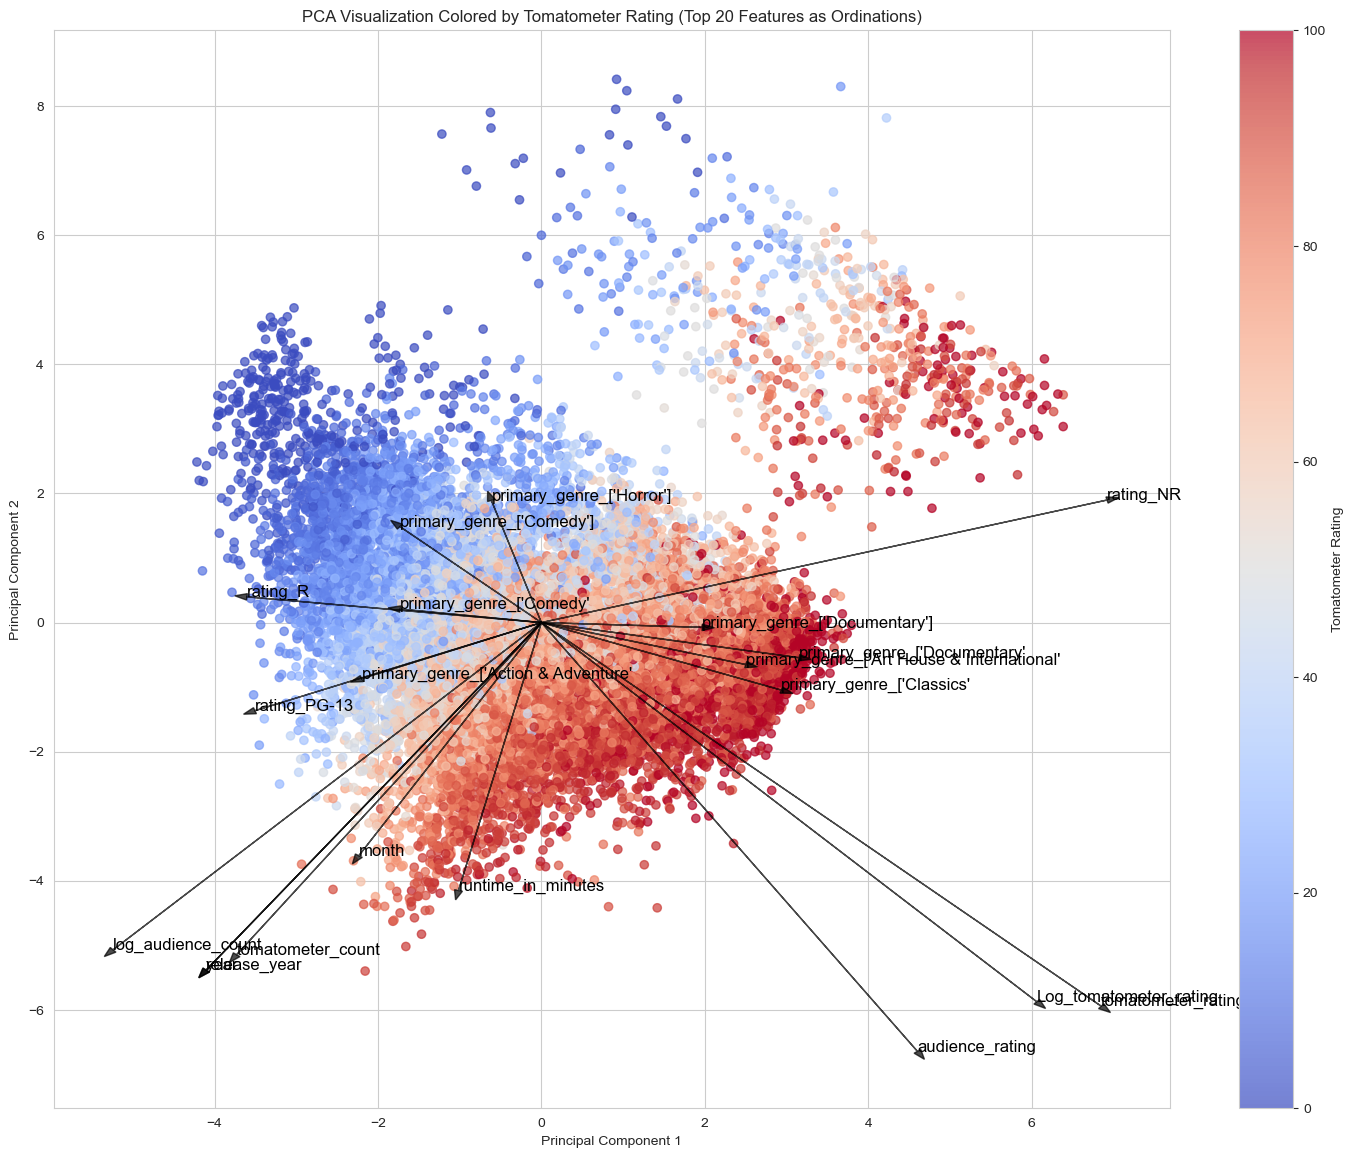

In [113]:
# Convert 'in_theaters_date' to year
if 'in_theaters_date' in df_cleaned.columns:
    df_cleaned['release_year'] = pd.to_datetime(df_cleaned['in_theaters_date'], errors='coerce').dt.year

# Drop unnecessary columns
df_cleaned = df_cleaned.drop(columns=['movie_title', 'movie_info', 'critics_consensus', 'on_streaming_date', 'in_theaters_date'], errors='ignore')

# Ensure 'log_audience_count' exists, otherwise compute it
if 'audience_count' in df_cleaned.columns and 'log_audience_count' not in df_cleaned.columns:
    df_cleaned['log_audience_count'] = np.log1p(df_cleaned['audience_count'])

# Drop original 'audience_count' column
df_cleaned = df_cleaned.drop(columns=['audience_count'], errors='ignore')

# One-Hot Encode 'primary_genre' and 'rating'
categorical_cols = ['primary_genre', 'rating']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

df_categorical = df_cleaned[categorical_cols].fillna("Unknown")  # Fill NaNs before encoding
df_categorical_encoded = encoder.fit_transform(df_categorical)
print("Shape of df_categorical_encoded:", df_categorical_encoded.shape)
print("Feature Names from OneHotEncoder:", encoder.get_feature_names_out(categorical_cols))

# Convert to DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
df_categorical_encoded = pd.DataFrame(df_categorical_encoded, columns=encoded_feature_names, index=df_cleaned.index)


# Merge encoded categorical data with numerical data
df_cleaned = pd.concat([df_cleaned, df_categorical_encoded], axis=1)

# Drop original categorical columns
df_cleaned = df_cleaned.drop(columns=categorical_cols, errors='ignore')

# Ensure 'release_year' is numeric
if 'release_year' in df_cleaned.columns:
    df_cleaned['release_year'] = pd.to_numeric(df_cleaned['release_year'], errors='coerce')

# Keep only numeric columns
df_numeric = df_cleaned.select_dtypes(include=['number'])

# Fill missing values with 0 to prevent PCA issues
df_numeric = df_numeric.fillna(0)

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create PCA DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['OriginalIndex'] = df_numeric.index

# Compute PCA loadings (for ordination arrows)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Ensure 'tomatometer_rating' is numeric
if 'tomatometer_rating' in df_numeric.columns:
    pca_df['tomatometer_rating'] = df_numeric['tomatometer_rating'].values  # Add ratings back for visualization

# Compute PCA loadings (for ordination arrows)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Compute the importance of each feature (loading magnitude)
loading_magnitudes = np.sqrt(loadings[:, 0]**2 + loadings[:, 1]**2)

# Get indices of top 20 most important features
top_features_idx = np.argsort(loading_magnitudes)[-20:]  # Select the 20 highest values

# Get corresponding column names
top_features = [df_numeric.columns[i] for i in top_features_idx]

# Plot PCA with color based on Tomatometer rating
plt.figure(figsize=(18,14))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['tomatometer_rating'], cmap='coolwarm', alpha=0.7)

# Add ordination arrows for the top 20 PCA loadings
for i in top_features_idx:
    plt.arrow(0, 0, loadings[i, 0] * 10, loadings[i, 1] * 10, color='black', alpha=0.7, head_width=0.1)
    plt.text(loadings[i, 0] * 10, loadings[i, 1] * 10, df_numeric.columns[i], color='black', fontsize=12)

plt.colorbar(scatter, label='Tomatometer Rating')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization Colored by Tomatometer Rating (Top 20 Features as Ordinations)')
plt.show()

In [114]:
# Checking the explained variance
explained_variance = pca.explained_variance_ratio_
variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})
variance_df

Principal Component  Explained Variance
0                 PC1            0.066101
1                 PC2            0.059705

## Statistical Tests

### ANOVA

In [115]:
anova_data = [df_exploded_genres[df_exploded_genres["genre"] == genre]["tomatometer_rating"].dropna() 
              for genre in df_exploded_genres["genre"].unique() if len(df_exploded_genres[df_exploded_genres["genre"] == genre]) > 10]

anova_result = stats.f_oneway(*anova_data)
anova_result

F_onewayResult(statistic=174.6438560774878, pvalue=0.0)

***A p-value of 0.0 (or effectively < 0.05) means you reject the null hypothesis with very high confidence. In statistical terms, this indicates that there are significant differences in the average Tomatometer ratings across genres.***

***For example: Genres like "Drama" or "Classics" might have higher average ratings compared to "Horror" or "Comedy."***

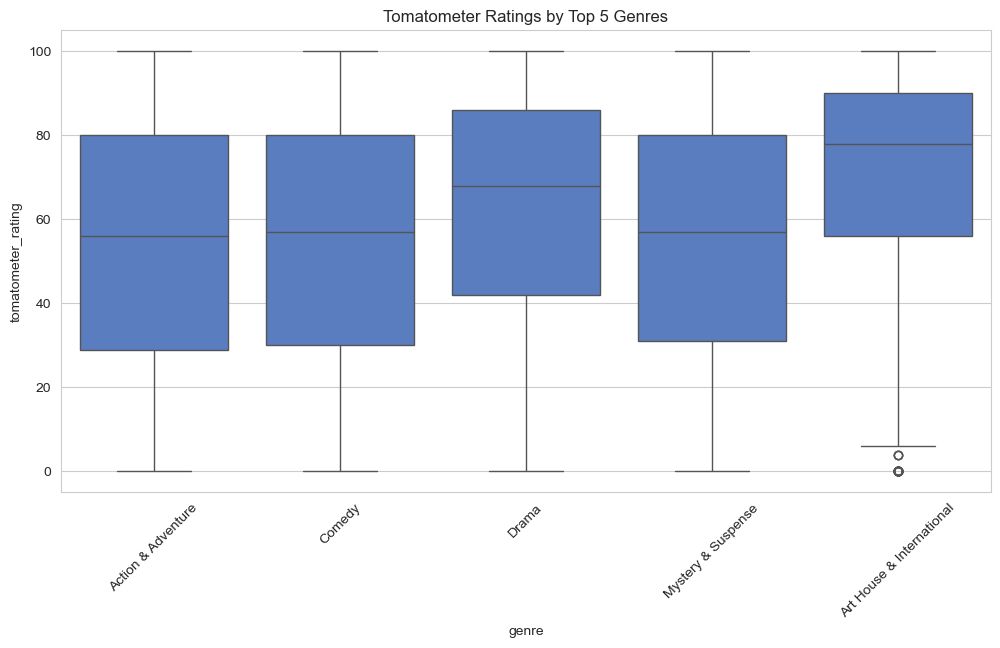

In [118]:
top_genres = df_exploded['genre'].value_counts().head(5).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='tomatometer_rating', data=df_exploded[df_exploded['genre'].isin(top_genres)])
plt.title('Tomatometer Ratings by Top 5 Genres')
plt.xticks(rotation=45)
plt.show()

### Chi-Square Test

In [122]:
# Explode genres so each director-genre pair is a row
df_exploded = df.assign(genre=df['genre'].str.split(',')).explode('genre')
df_exploded['genre'] = df_exploded['genre'].str.strip()
# Create a contingency table
contingency_table = pd.crosstab(df_exploded['directors'], df_exploded['genre'])
# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print((chi2, p, dof))

(181278.02427346562, 1.5174614478592493e-144, 166100)


***Since the p-value is extremely small (< 0.05), we reject the null hypothesis. This means that there is a statistically significant relationship between movie directors and the genres they produce. In other words, certain directors are more likely to produce specific genres.***

### GLM

                 Generalized Linear Model Regression Results                  
Dep. Variable:     tomatometer_rating   No. Observations:                34595
Model:                            GLM   Df Residuals:                    34528
Model Family:                Gaussian   Df Model:                           66
Link Function:               Identity   Scale:                          656.03
Method:                          IRLS   Log-Likelihood:            -1.6125e+05
Date:                Tue, 04 Mar 2025   Deviance:                   2.2651e+07
Time:                        00:21:05   Pearson chi2:                 2.27e+07
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1922
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

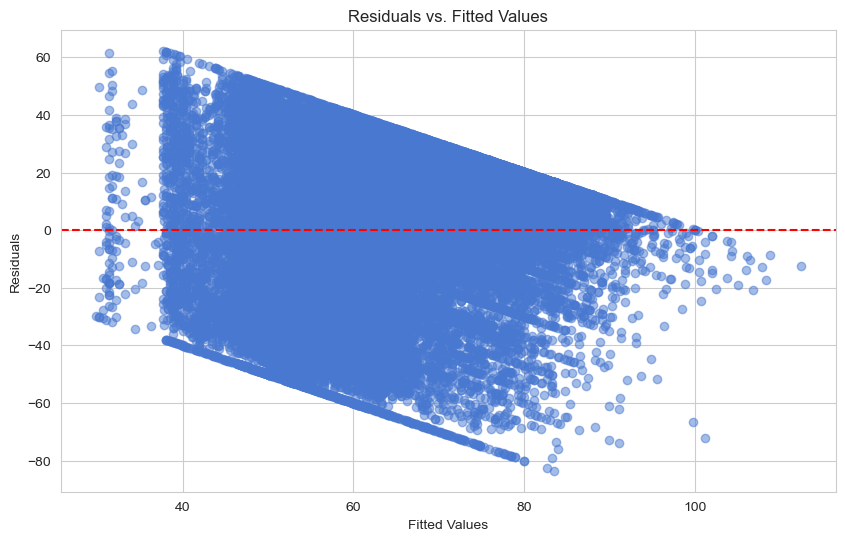

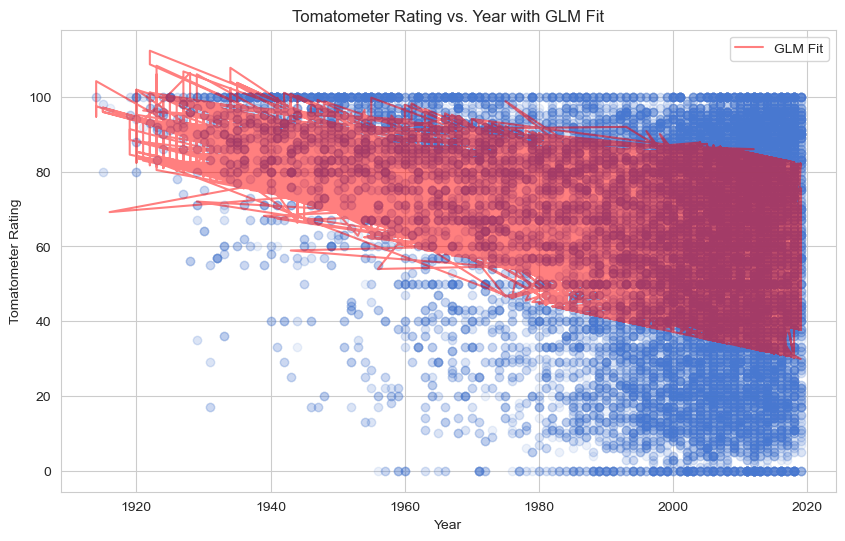

In [126]:
# Step 1: Preprocess the data
# Convert 'genre' to string and handle non-string/missing values
df_cleaned['genre'] = df_cleaned['genre'].astype(str)  # Force all to string, turns NaN to 'nan'

# Split the genre column and explode it
df_exploded = df_cleaned.assign(genre=df_cleaned['genre'].str.split(',')).explode('genre')
df_exploded['genre'] = df_exploded['genre'].str.strip()

# Drop rows with missing or invalid key columns
df_exploded = df_exploded.dropna(subset=['tomatometer_rating', 'year', 'genre'])

# Filter out any 'nan' strings that came from original NaN values
df_exploded = df_exploded[df_exploded['genre'] != 'nan']

# Step 2: Prepare the data for GLM
formula = 'tomatometer_rating ~ C(genre) + year'

# Step 3: Fit the GLM (Gaussian family with identity link)
model = smf.glm(formula=formula, data=df_exploded, family=sm.families.Gaussian()).fit()

# Step 4: Print the summary of the model
print(model.summary())

# Step 5: Plot residuals vs. fitted values
predictions = model.predict()
residuals = df_exploded['tomatometer_rating'] - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Step 6: Plot effect of year
plt.figure(figsize=(10, 6))
plt.scatter(df_exploded['year'], df_exploded['tomatometer_rating'], alpha=0.1)
plt.plot(df_exploded['year'], predictions, color='red', alpha=0.5, label='GLM Fit')
plt.xlabel('Year')
plt.ylabel('Tomatometer Rating')
plt.title('Tomatometer Rating vs. Year with GLM Fit')
plt.legend()
plt.show()

**1. Overall**
- *The GLM confirms that both genre and year significantly affect tomatometer_rating, explaining 19.2% of the variance.*

**2. Year Trend**
- *Ratings decrease by 0.375 points per year, suggesting movies are getting slightly worse critical reception over time (p=0.000).*

**3. Genre Effects**
- *"Animation," "Documentary," and "Gay & Lesbian" genres have significantly higher ratings than "Action & Adventure."*
- *"Horror," "Comedy," and "Cult Movies" have significantly lower ratings.*

**4. Practical Insight**
- *If you’re a filmmaker aiming for high Tomatometer scores, focus on genres like "Documentary" or "Animation" rather than "Horror" or "Cult Movies." Also, recent years seem tougher for critical acclaim.*

## Most Parsimonious Model (Lowest AIC, VIF)

Full Model AIC: 120373.39009621313


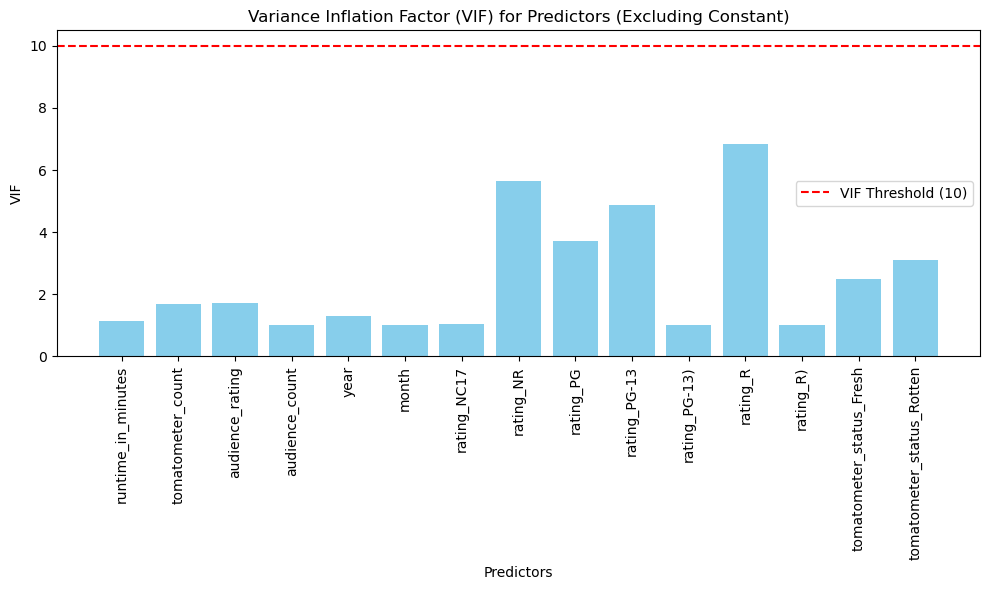

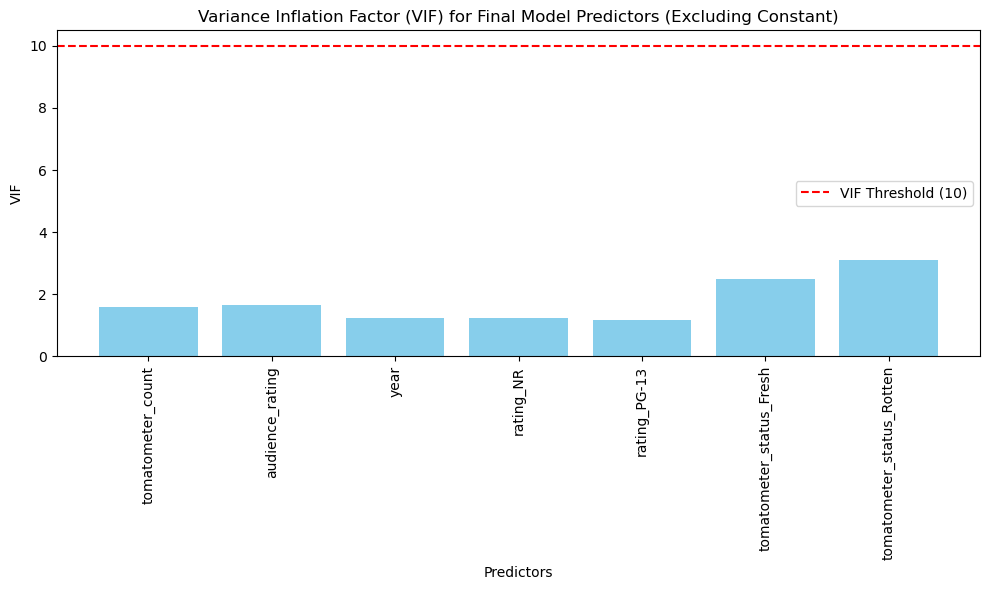

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:     tomatometer_rating   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     9188.
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:13:45   Log-Likelihood:                -60183.
No. Observations:               15258   AIC:                         1.204e+05
Df Residuals:                   15250   BIC:                         1.204e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
c

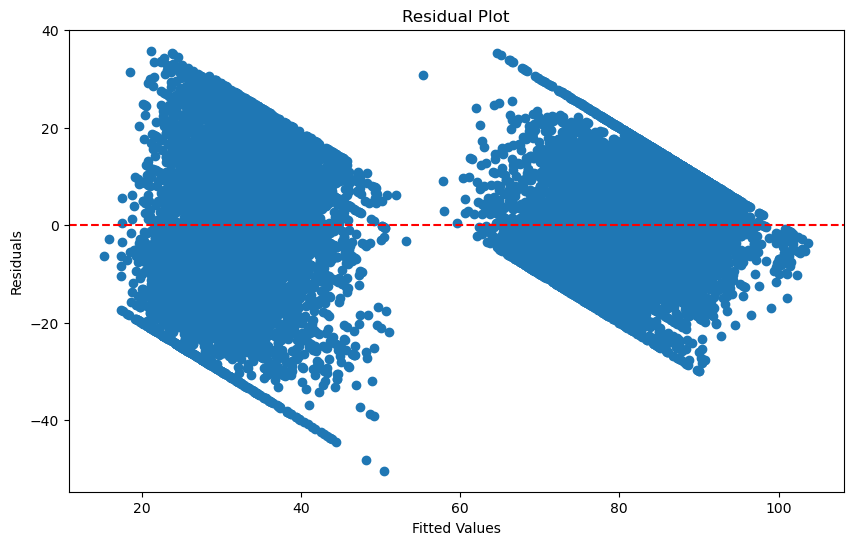

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\df_cleaned.csv")

# Define target and initial predictors (simplified to reduce computation)
target = 'tomatometer_rating'
initial_predictors = [
    'runtime_in_minutes', 'tomatometer_count', 'audience_rating', 'audience_count',
    'year', 'month', 'rating', 'tomatometer_status'  # Excluding 'genre' and 'studio_name' for speed
]

# Preprocess: Handle missing values and ensure numeric columns
data = data.dropna(subset=[target] + initial_predictors)
numeric_cols = ['runtime_in_minutes', 'tomatometer_count', 'audience_rating', 'audience_count', 'year', 'month']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numeric_cols)

# Convert categorical variables to dummies (limited scope)
data = pd.get_dummies(data, columns=['rating', 'tomatometer_status'], drop_first=True)

# Update predictors
dummy_cols = [col for col in data.columns if col.startswith(('rating_', 'tomatometer_status_'))]
all_predictors = numeric_cols + dummy_cols

# Prepare X and y
X = data[all_predictors].astype(float)
y = data[target].astype(float)
X = sm.add_constant(X)

# Initial full model
full_model = sm.OLS(y, X).fit()
print("Full Model AIC:", full_model.aic)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Predictor'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Plot VIF values with threshold, excluding 'const'
vif_data_no_const = vif_data[vif_data['Predictor'] != 'const']  # Filter out constant
plt.figure(figsize=(10, 6))
plt.bar(vif_data_no_const['Predictor'], vif_data_no_const['VIF'], color='skyblue')
plt.axhline(y=10, color='red', linestyle='--', label='VIF Threshold (10)')
plt.xticks(rotation=90)
plt.xlabel('Predictors')
plt.ylabel('VIF')
plt.title('Variance Inflation Factor (VIF) for Predictors (Excluding Constant)')
plt.legend()
plt.tight_layout()
plt.show()

# Remove predictors with VIF > 10
high_vif = vif_data[vif_data['VIF'] > 10]['Predictor'].tolist()
if 'const' in high_vif:
    high_vif.remove('const')
reduced_predictors = [p for p in all_predictors if p not in high_vif]

# Fit reduced model
X_reduced = sm.add_constant(data[reduced_predictors].astype(float))
reduced_model = sm.OLS(y, X_reduced).fit()

# Faster stepwise selection using sklearn (forward selection only)
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward', scoring='neg_mean_squared_error', cv=5)
sfs.fit(X_reduced.drop(columns='const'), y)  # Exclude constant for sklearn
selected_features = X_reduced.columns[1:][sfs.get_support()].tolist()  # Adjust for constant

# Final model with selected features
X_final = sm.add_constant(data[selected_features].astype(float))
final_model = sm.OLS(y, X_final).fit()

# Recalculate VIF for final model, excluding 'const' in plot
vif_final = pd.DataFrame()
vif_final['Predictor'] = X_final.columns
vif_final['VIF'] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# Plot VIF for final model, excluding 'const'
vif_final_no_const = vif_final[vif_final['Predictor'] != 'const']
plt.figure(figsize=(10, 6))
plt.bar(vif_final_no_const['Predictor'], vif_final_no_const['VIF'], color='skyblue')
plt.axhline(y=10, color='red', linestyle='--', label='VIF Threshold (10)')
plt.xticks(rotation=90)
plt.xlabel('Predictors')
plt.ylabel('VIF')
plt.title('Variance Inflation Factor (VIF) for Final Model Predictors (Excluding Constant)')
plt.legend()
plt.tight_layout()
plt.show()

# Print results
print("Final Model Summary:")
print(final_model.summary())
print("\nFinal Predictors:", selected_features)
print("\nVIF for Final Model:")
print(vif_final)

# Residual plot
residuals = final_model.resid
plt.figure(figsize=(10, 6))
plt.scatter(final_model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### All VIF values are well below 10 (and even below 5), indicating no significant multicollinearity among predictors. The highest VIF is 3.11 for tomatometer_status_Rotten, which is acceptable. This suggests the predictors are relatively independent, and the model isn’t inflated by collinearity.

***Practical Insights***
- Critic vs. Audience Alignment: The positive coefficient for audience_rating (0.3028) shows that critics and audiences tend to agree, but the effect isn’t 1:1. A movie loved by audiences might still get a lukewarm critic score, indicating differing priorities (e.g., critics may value artistic merit more).
- Impact of Status: The large negative coefficients for tomatometer_status_Fresh and tomatometer_status_Rotten reflect the inherent definition of these categories. However, their inclusion in the model helps adjust for systematic differences in ratings within these groups.
- Historical Trend: The negative year coefficient (-0.0951) suggests that newer movies (e.g., 2010s) tend to have slightly lower critic ratings than older ones (e.g., 1950s). This could reflect nostalgia, stricter modern standards, or a saturation of lower-quality films in recent years.
- Rating Effects: NR movies score higher, possibly because they include critically acclaimed classics (e.g., 12 Angry Men). PG-13 movies score lower, perhaps due to a perception of being more commercial or less innovative.
- Review Volume Matters: The positive effect of tomatometer_count (0.6147) suggests that movies with more reviews tend to score higher, possibly because high-quality movies attract more attention.

## Common Machine Learning Algorithms
### Linear Regression

Simple Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:     tomatometer_rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     146.6
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           1.34e-33
Time:                        18:15:53   Log-Likelihood:                -72713.
No. Observations:               15258   AIC:                         1.454e+05
Df Residuals:                   15256   BIC:                         1.454e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
cons

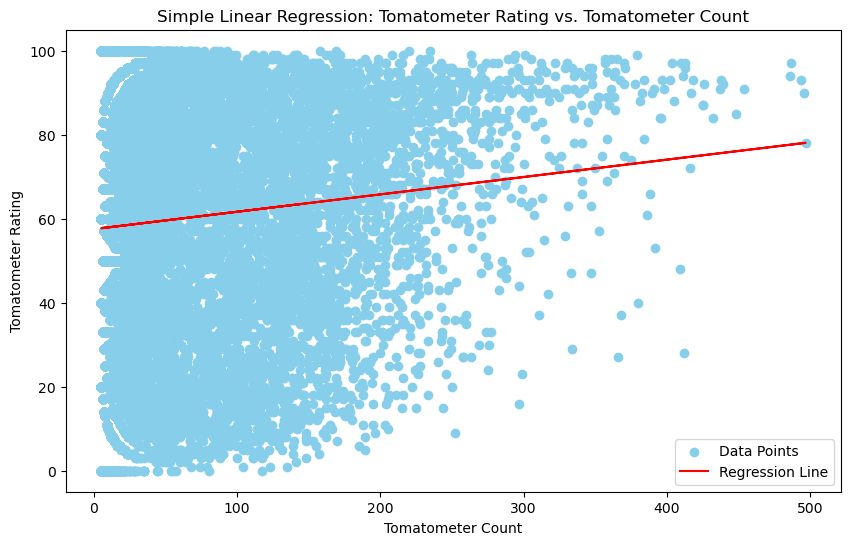

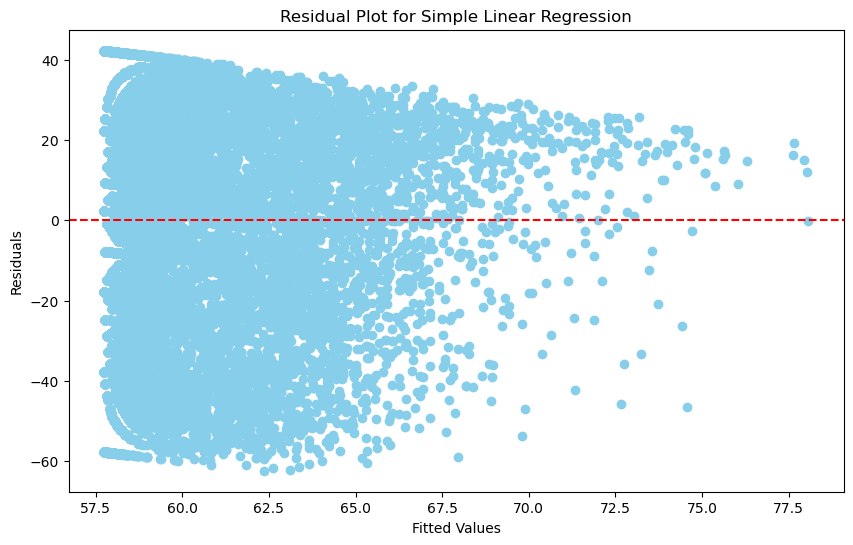

In [11]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define target and predictor
target = 'tomatometer_rating'
predictor = 'tomatometer_count'

# Preprocess: Handle missing values and ensure numeric
data = data.dropna(subset=[target, predictor])
data[predictor] = pd.to_numeric(data[predictor], errors='coerce')
data[target] = pd.to_numeric(data[target], errors='coerce')
data = data.dropna(subset=[predictor, target])

# Prepare X and y
X = data[predictor].astype(float)
X = sm.add_constant(X)  # Add intercept
y = data[target].astype(float)

# Fit simple linear regression
model = sm.OLS(y, X).fit()

# Print results
print("Simple Linear Regression Summary:")
print(model.summary())

# Plot: Scatter with regression line
plt.figure(figsize=(10, 6))
plt.scatter(data[predictor], y, color='skyblue', label='Data Points')
plt.plot(data[predictor], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Tomatometer Count')
plt.ylabel('Tomatometer Rating')
plt.title('Simple Linear Regression: Tomatometer Rating vs. Tomatometer Count')
plt.legend()
plt.show()

# Residual plot
residuals = model.resid
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Simple Linear Regression')
plt.show()

### Logistic Regression

Optimization terminated successfully.
         Current function value: 0.482583
         Iterations 6
Logistic Regression Summary:
                           Logit Regression Results                           
Dep. Variable:          binary_status   No. Observations:                15258
Model:                          Logit   Df Residuals:                    15253
Method:                           MLE   Df Model:                            4
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.2970
Time:                        18:18:42   Log-Likelihood:                -7363.3
converged:                       True   LL-Null:                       -10475.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 26.5934      2.555     10.409      0.000 

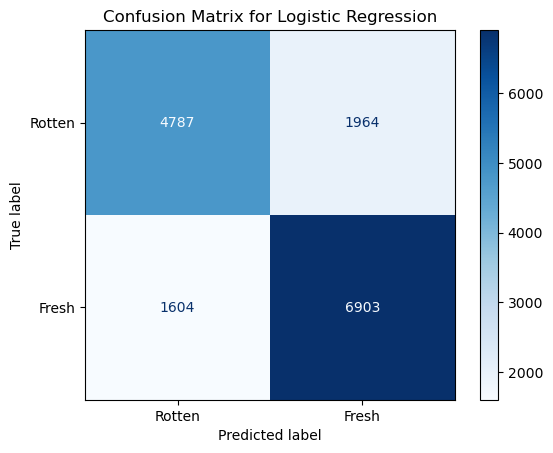

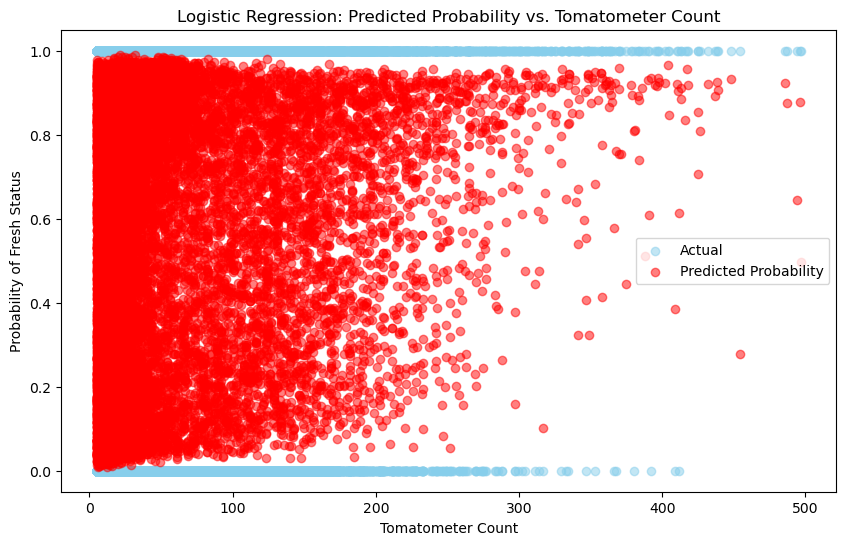

In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\df_cleaned.csv")
# Define predictors and create binary target
predictors = ['runtime_in_minutes', 'tomatometer_count', 'audience_rating', 'year']
data = data.dropna(subset=predictors + ['tomatometer_status'])

# Convert numeric columns
for col in predictors:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=predictors)

# Binarize tomatometer_status: 1 = Fresh/Certified Fresh, 0 = Rotten
data['binary_status'] = data['tomatometer_status'].apply(lambda x: 1 if x in ['Fresh', 'Certified Fresh'] else 0)
target = 'binary_status'

# Prepare X and y
X = data[predictors].astype(float)
X = sm.add_constant(X)  # Add intercept
y = data[target].astype(int)

# Fit logistic regression
model = sm.Logit(y, X).fit()

# Print results
print("Logistic Regression Summary:")
print(model.summary())

# Predicted probabilities
y_pred_prob = model.predict(X)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rotten', 'Fresh'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Plot predicted probabilities
plt.figure(figsize=(10, 6))
plt.scatter(X['tomatometer_count'], y, color='skyblue', label='Actual', alpha=0.5)
plt.scatter(X['tomatometer_count'], y_pred_prob, color='red', label='Predicted Probability', alpha=0.5)
plt.xlabel('Tomatometer Count')
plt.ylabel('Probability of Fresh Status')
plt.title('Logistic Regression: Predicted Probability vs. Tomatometer Count')
plt.legend()
plt.show()

## Cluster Analysis (Using K-Means Algorithm)
### Elbow method
### Silhouette Score

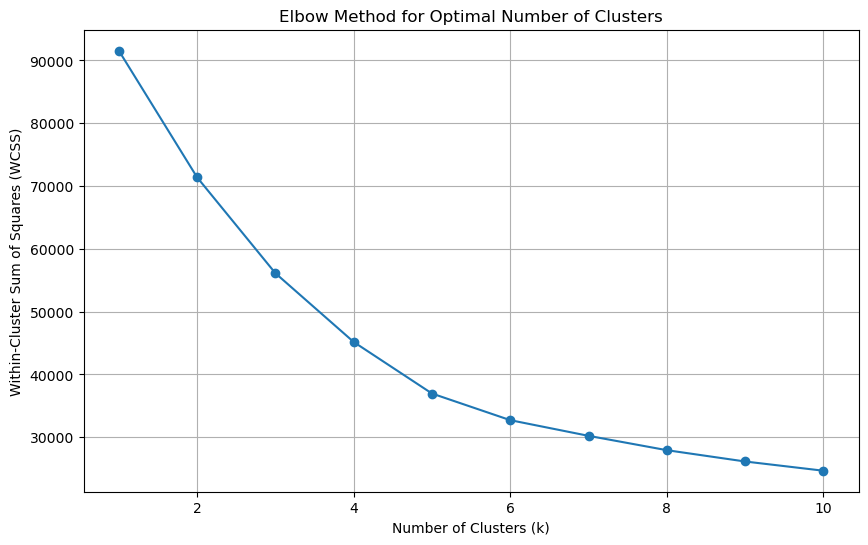

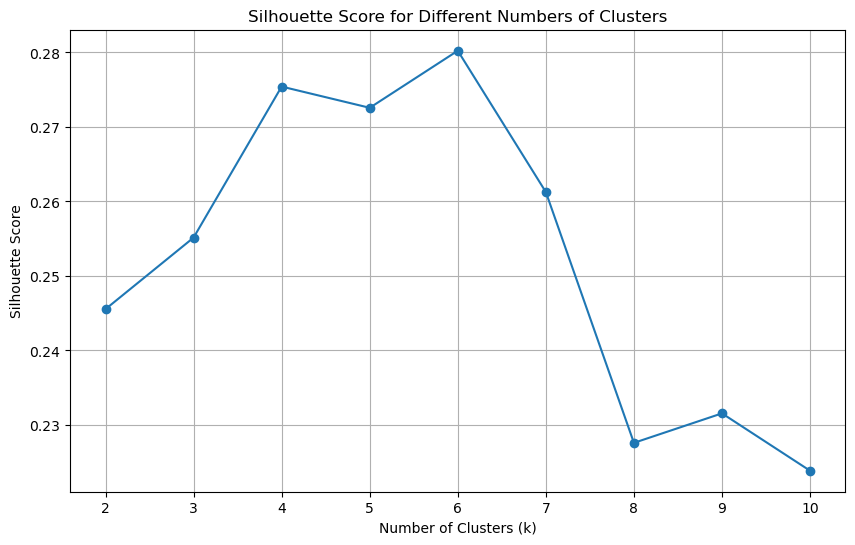

Optimal number of clusters based on Silhouette Score: 6


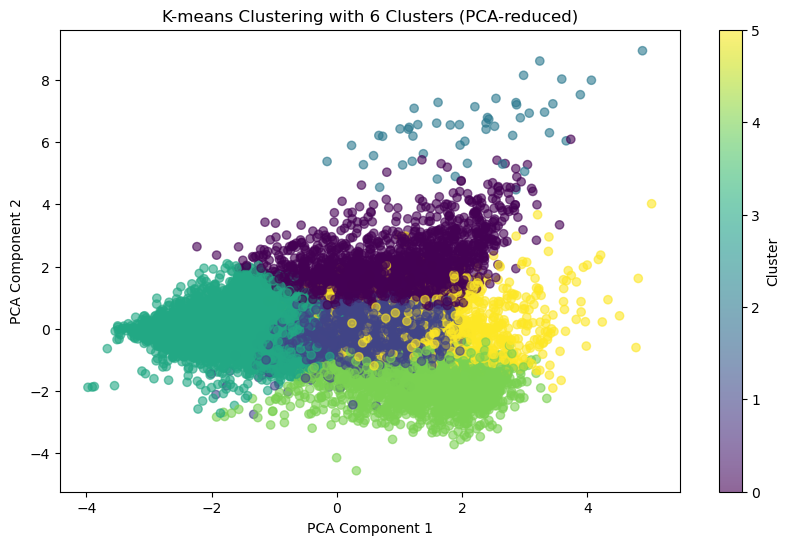

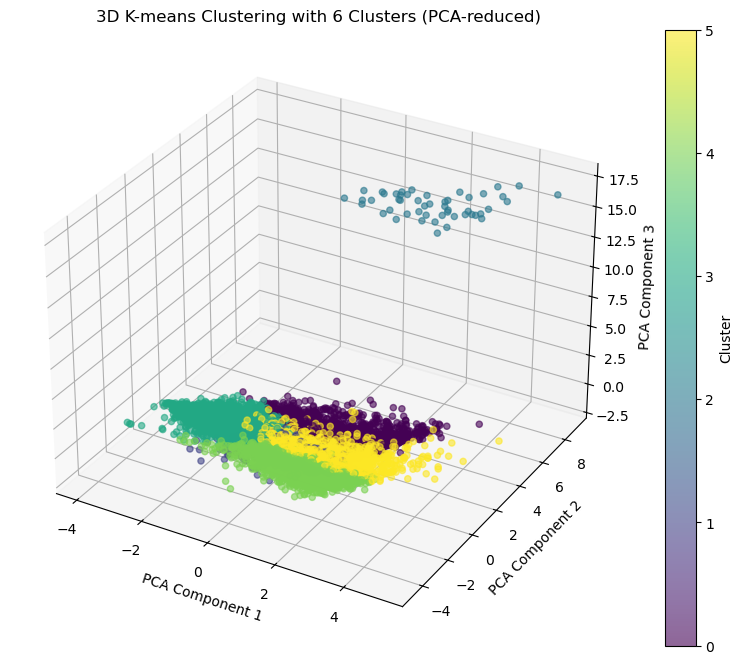

Cluster Summary (Mean Values of Features):
         runtime_in_minutes  tomatometer_count  audience_rating  \
Cluster                                                           
0                113.386374         193.382087        68.130062   
1                 95.367913          39.947921        70.662117   
2                120.280000         176.640000        65.640000   
3                 97.586240          40.705355        40.306461   
4                 99.540193          20.147910        73.496785   
5                141.055916          41.789303        75.811994   

         audience_count         year  tomatometer_rating  
Cluster                                                   
0          1.848141e+05  2010.482134           68.619819  
1          2.723654e+04  2006.328643           75.959891  
2          3.287846e+07  2001.260000           68.640000  
3          4.085917e+04  2003.810368           29.972746  
4          1.872987e+04  1958.417471           84.368703  
5      

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

data = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\df_cleaned.csv")

# Step 1: Feature Selection and Preprocessing
# Select numerical features for clustering
features = [
    'runtime_in_minutes', 'tomatometer_count', 'audience_rating', 
    'audience_count', 'year', 'tomatometer_rating'
]

# Drop rows with missing values in these features
data = data.dropna(subset=features)

# Convert to numeric and drop any rows with conversion issues
for col in features:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=features)

# Standardize the features (K-means is sensitive to scale)
X = data[features].astype(float)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Elbow Method to find optimal number of clusters
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Step 3: Silhouette Score to confirm optimal number of clusters
silhouette_scores = []
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Determine optimal number of clusters (highest silhouette score)
optimal_clusters = range(2, max_clusters + 1)[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters}")

# Step 4: Apply K-means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Visualize Clusters (using PCA for dimensionality reduction to 2D)
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-means Clustering with {optimal_clusters} Clusters (PCA-reduced)')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Optional: 3D Plot if you want to visualize three PCA components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)
data['PCA3'] = X_pca_3d[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=data['Cluster'], cmap='viridis', alpha=0.6)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title(f'3D K-means Clustering with {optimal_clusters} Clusters (PCA-reduced)')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Step 6: Analyze Clusters (optional: mean values of features per cluster)
cluster_summary = data.groupby('Cluster')[features].mean()
print("Cluster Summary (Mean Values of Features):")
print(cluster_summary)

***6 Clusters was chosen as the optimal number of clusters!***

## Natural Language Proccessing (NLP) on Critics Consensus


Top 20 Keywords and Their Frequencies:
story: 729
cast: 635
performances: 628
performance: 594
film: 489
movie: 486
enough: 476
comedy: 464
may: 420
offers: 398
drama: 392
thriller: 371
director: 366
action: 356
plot: 349
characters: 346
though: 337
funny: 328
one: 316
make: 311

Top 10 Keywords in Fresh/Certified Fresh Films:
performances: 483
performance: 462
story: 410
cast: 334
film: 324
drama: 303
offers: 303
director: 285
may: 262
comedy: 254

Top 10 Keywords in Rotten Films:
story: 319
cast: 301
movie: 290
enough: 268
plot: 251
comedy: 210
characters: 199
action: 186
film: 165
little: 163

Top 10 Keywords in Comedy Films:
comedy: 448
funny: 276
cast: 264
movie: 227
performances: 216
humor: 190
enough: 182
laughs: 163
story: 155
performance: 150

Top 10 Keywords in Drama Films:
performances: 505
story: 488
performance: 469
cast: 425
drama: 365
film: 329
director: 254
thriller: 252
movie: 250
strong: 226

Top 10 Keywords in Action Films:
action: 302
story: 159
movie: 153
plot: 14

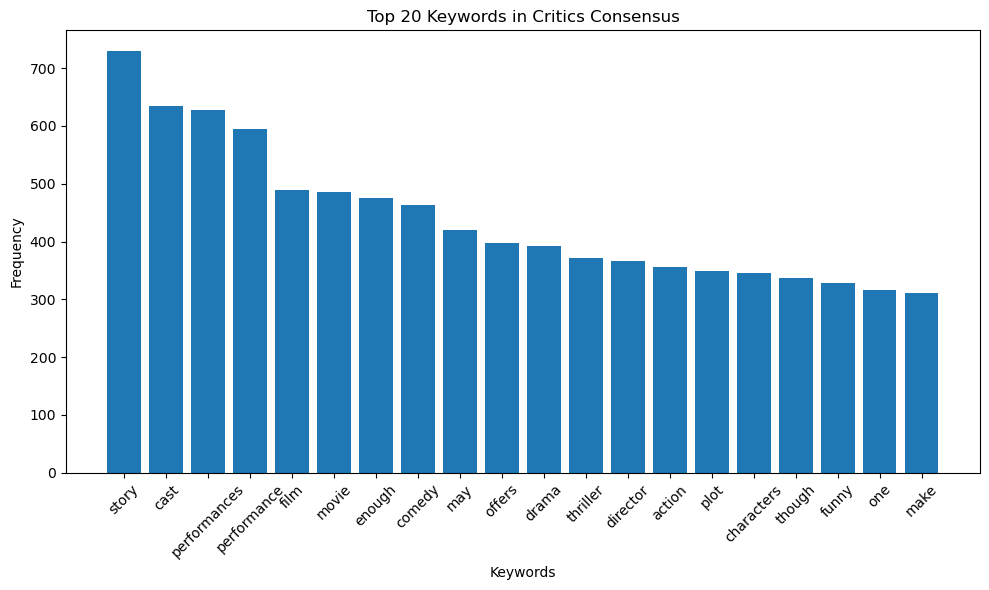

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter
import string
import matplotlib.pyplot as plt

# Download NLTK data (run once if not already downloaded)
#nltk.download('punkt')
#nltk.download('stopwords')

# Convert sample data to DataFrame (replace with pd.read_csv('your_file.csv') for actual file)
df = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\WS2425\\Applied Statistical Data Analysis\\Group Work Datasets\\Rotten Tomatoes Movies.csv")

# Handle missing values: Drop rows where critics_consensus is NaN
df = df.dropna(subset=['critics_consensus'])

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to critics_consensus column
df['tokens'] = df['critics_consensus'].apply(preprocess_text)

# Flatten list of tokens and count frequencies
all_tokens = [token for sublist in df['tokens'] for token in sublist]
keyword_counts = Counter(all_tokens)

# Get top 20 most common keywords
top_keywords = keyword_counts.most_common(20)
print("\nTop 20 Keywords and Their Frequencies:")
for keyword, freq in top_keywords:
    print(f"{keyword}: {freq}")

# Handle NaN in tomtometer_status and genre by filling with a placeholder or dropping
df['tomatometer_status'] = df['tomatometer_status'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Unknown')

# Analyze keywords by Tomatometer status
fresh_tokens = [token for i, tokens in df[df['tomatometer_status'].isin(['Fresh', 'Certified Fresh'])].iterrows() 
                for token in tokens['tokens']]
rotten_tokens = [token for i, tokens in df[df['tomatometer_status'] == 'Rotten'].iterrows() 
                 for token in tokens['tokens']]

fresh_counts = Counter(fresh_tokens)
rotten_counts = Counter(rotten_tokens)

print("\nTop 10 Keywords in Fresh/Certified Fresh Films:")
for keyword, freq in fresh_counts.most_common(10):
    print(f"{keyword}: {freq}")

print("\nTop 10 Keywords in Rotten Films:")
for keyword, freq in rotten_counts.most_common(10):
    print(f"{keyword}: {freq}")

# Analyze keywords by genre (example: Comedy vs. Drama)
comedy_tokens = [token for i, tokens in df[df['genre'].str.contains('Comedy', na=False)].iterrows() 
                 for token in tokens['tokens']]
drama_tokens = [token for i, tokens in df[df['genre'].str.contains('Drama', na=False)].iterrows() 
                for token in tokens['tokens']]
action_tokens = [token for i, tokens in df[df['genre'].str.contains('Action', na=False)].iterrows() 
                 for token in tokens['tokens']]
horror_tokens = [token for i, tokens in df[df['genre'].str.contains('Horror', na=False)].iterrows() 
                 for token in tokens['tokens']]

comedy_counts = Counter(comedy_tokens)
drama_counts = Counter(drama_tokens)
action_counts = Counter(action_tokens)
horror_counts = Counter(horror_tokens)


print("\nTop 10 Keywords in Comedy Films:")
for keyword, freq in comedy_counts.most_common(10):
    print(f"{keyword}: {freq}")

print("\nTop 10 Keywords in Drama Films:")
for keyword, freq in drama_counts.most_common(10):
    print(f"{keyword}: {freq}")

print("\nTop 10 Keywords in Action Films:")
for keyword, freq in action_counts.most_common(10):
    print(f"{keyword}: {freq}")

print("\nTop 10 Keywords in Horror Films:")
for keyword, freq in horror_counts.most_common(10):
    print(f"{keyword}: {freq}")

# Visualization
top_keywords_labels, top_keywords_freqs = zip(*top_keywords)
plt.figure(figsize=(10, 6))
plt.bar(top_keywords_labels, top_keywords_freqs)
plt.xticks(rotation=45)
plt.title("Top 20 Keywords in Critics Consensus")
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Insights Based on the Corrected Results

***1. Overall Trends (Top 20 Keywords Across All Films)***
- Narrative Focus: "Story" (729) and "plot" (349) are critical, with "story" being the most frequent keyword overall. This underscores that critics universally prioritize the narrative, whether praising its depth or critiquing its weaknesses.
- Acting Emphasis: "Cast" (635), "performances" (628), and "performance" (594) dominate, indicating that acting quality is a close second to story in critical evaluations.
- Genre Relevance: "Comedy" (464), "drama" (392), "thriller" (371), and "action" (356) reflect the dataset’s genre diversity and their frequent mention in reviews, either as identifiers or evaluative terms.
- Qualifiers: "Enough" (476), "may" (420), and "though" (337) suggest nuanced or conditional critiques, common in both positive and negative reviews.
- Entertainment Value: "Funny" (328) and "offers" (398) highlight a focus on what films deliver—humor, engagement, or emotional resonance.

***2. Fresh/Certified Fresh Films vs. Rotten Films***

**Fresh/Certified Fresh:**

- Acting Excellence: "Performances" (483) and "performance" (462) lead, far outpacing their Rotten counterparts (145 and 132 less, respectively, assuming total subtraction). This suggests that standout acting is a key differentiator for highly rated films.
- Story Strength: "Story" (410) is prominent but less frequent than in Rotten films relative to total mentions (319/729 = 44% in Rotten vs. 410/729 = 56% in Fresh), implying it’s praised more often in Fresh films.
- Artistic Merit: "Film" (324) outranks "movie" (not in top 10), and "director" (285) is significant, suggesting a focus on cinematic quality and vision.
- Positive Delivery: "Offers" (303) indicates these films successfully deliver value (e.g., "offers compelling drama").

**Rotten:**

- Narrative Critique: "Story" (319) and "plot" (251) top the list, but their high frequency likely reflects criticism (e.g., "weak story," "thin plot") rather than praise, given the Rotten status.
- Acting Mentioned but Less Praised: "Cast" (301) is high, but "performances" and "performance" drop out of the top 10, suggesting acting is noted but not a strength (628-483 = 145 and 594-462 = 132 fewer mentions than Fresh).
- Qualifier Heavy: "Enough" (268) and "little" (163) suggest frequent use of tempered or negative qualifiers (e.g., "not enough depth," "little substance").
- Genre Pitfalls: "Comedy" (210) and "action" (186) are prominent, possibly indicating over-reliance on genre tropes without substance (e.g., unfunny comedies, hollow action).
- Casual Tone: "Movie" (290) outranks "film" (165), hinting at a less artistic critique of Rotten titles.

**Comparison:**

- Acting Gap: Fresh films emphasize "performances" (483 vs. ~145 inferred), while Rotten films focus on "cast" (301) without performance praise, suggesting acting quality separates the two.
- Story Nuance: "Story" appears in both, but Fresh films likely use it positively (e.g., "gripping story"), while Rotten films use it negatively (e.g., "flimsy story").
- Tone: Fresh films lean toward "film" and "director" (artistic), while Rotten films favor "movie" and "enough" (critical or dismissive).

***3. Comedy Films***
- Humor is King: "Comedy" (448), "funny" (276), "humor" (190), and "laughs" (163) dominate, showing that comedic success hinges on delivering laughs.
- Acting Matters: "Cast" (264) and "performances" (216) are key, reflecting the importance of comedic timing and ensemble chemistry.
- Threshold Critique: "Enough" (182) suggests critics often assess whether humor meets expectations (e.g., "not funny enough").
- Story Secondary: "Story" (155) is less frequent than overall (729), indicating narrative takes a backseat to humor in comedies.

***4. Drama Films***
- Acting and Story Core: "Performances" (505), "story" (488), "performance" (469), and "cast" (425) lead, showing dramas thrive on emotional depth and acting prowess.
- Genre Identity: "Drama" (365) and "thriller" (252) reflect the genre’s focus and its overlap with suspense.
- Directorial Weight: "Director" (254) is prominent, suggesting vision elevates dramas.
- Strength Praised: "Strong" (226) uniquely ranks high, likely tied to "strong performances" or "strong story."

***5. Action and Horror Films***
- Emphasis on "action" and "thriller" shows genre focus, but "story" and "plot" critiques (with "enough," 126) suggest narrative weaknesses.
- "Horror," "scares," and "gore" (57) define the genre, with "enough" and "fans" indicating mixed success in delivering thrills.

***6. Cross-Category Comparisons***

**Comedy vs. Drama:**
- Comedies focus on "funny" and "humor," while dramas emphasize "story" and "strong," reflecting different critical lenses (entertainment vs. depth).
- "Cast" and "performances" are vital to both, but dramas have higher counts (425 vs. 264, 505 vs. 216), indicating greater acting scrutiny.

**Rotten vs. Genres:**
- Rotten films share "comedy" (210) with Comedy films (448), suggesting many poorly rated comedies fail on humor delivery ("enough," "little").
- "Story" (319) and "plot" (251) in Rotten align with Drama’s focus (488, not in top 10), but likely in a negative context.

***Actionable Insights***

**For Filmmakers:**
- To Achieve Fresh Status: Focus on stellar acting ("performances") and a strong narrative ("story"), with a clear directorial vision ("director").
- Avoid Rotten Pitfalls: Address common Rotten critiques—weak plots ("plot"), insufficient depth ("enough," "little"), and over-reliance on action or comedy without substance.
- Comedy: Prioritize humor and cast chemistry over intricate stories.
- Drama: Invest in powerful performances and a robust story, leveraging directorial flair.

***Concise Takeaways***

- *Fresh Success*: Stellar acting + strong story.
- *Rotten Flaws*: Weak narrative + insufficient delivery.
- *Comedy*: Humor > story.
- *Drama*: Acting + depth.
- *Action*: Spectacle, often thin plots.
- *Horror*: Scares for fans, mixed results.

***Conclusion***

The corrected Rotten data reveals a clear divide: Fresh films excel with "performances" and "story," while Rotten films struggle with "enough" substance and "little" impact, often leaning on "movie" and genre terms like "comedy" or "action." Comedies prioritize humor, while dramas demand acting and narrative strength. These trends highlight acting and storytelling as universal critical benchmarks, with genre-specific expectations shaping the tone.

### NLP Visualization

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


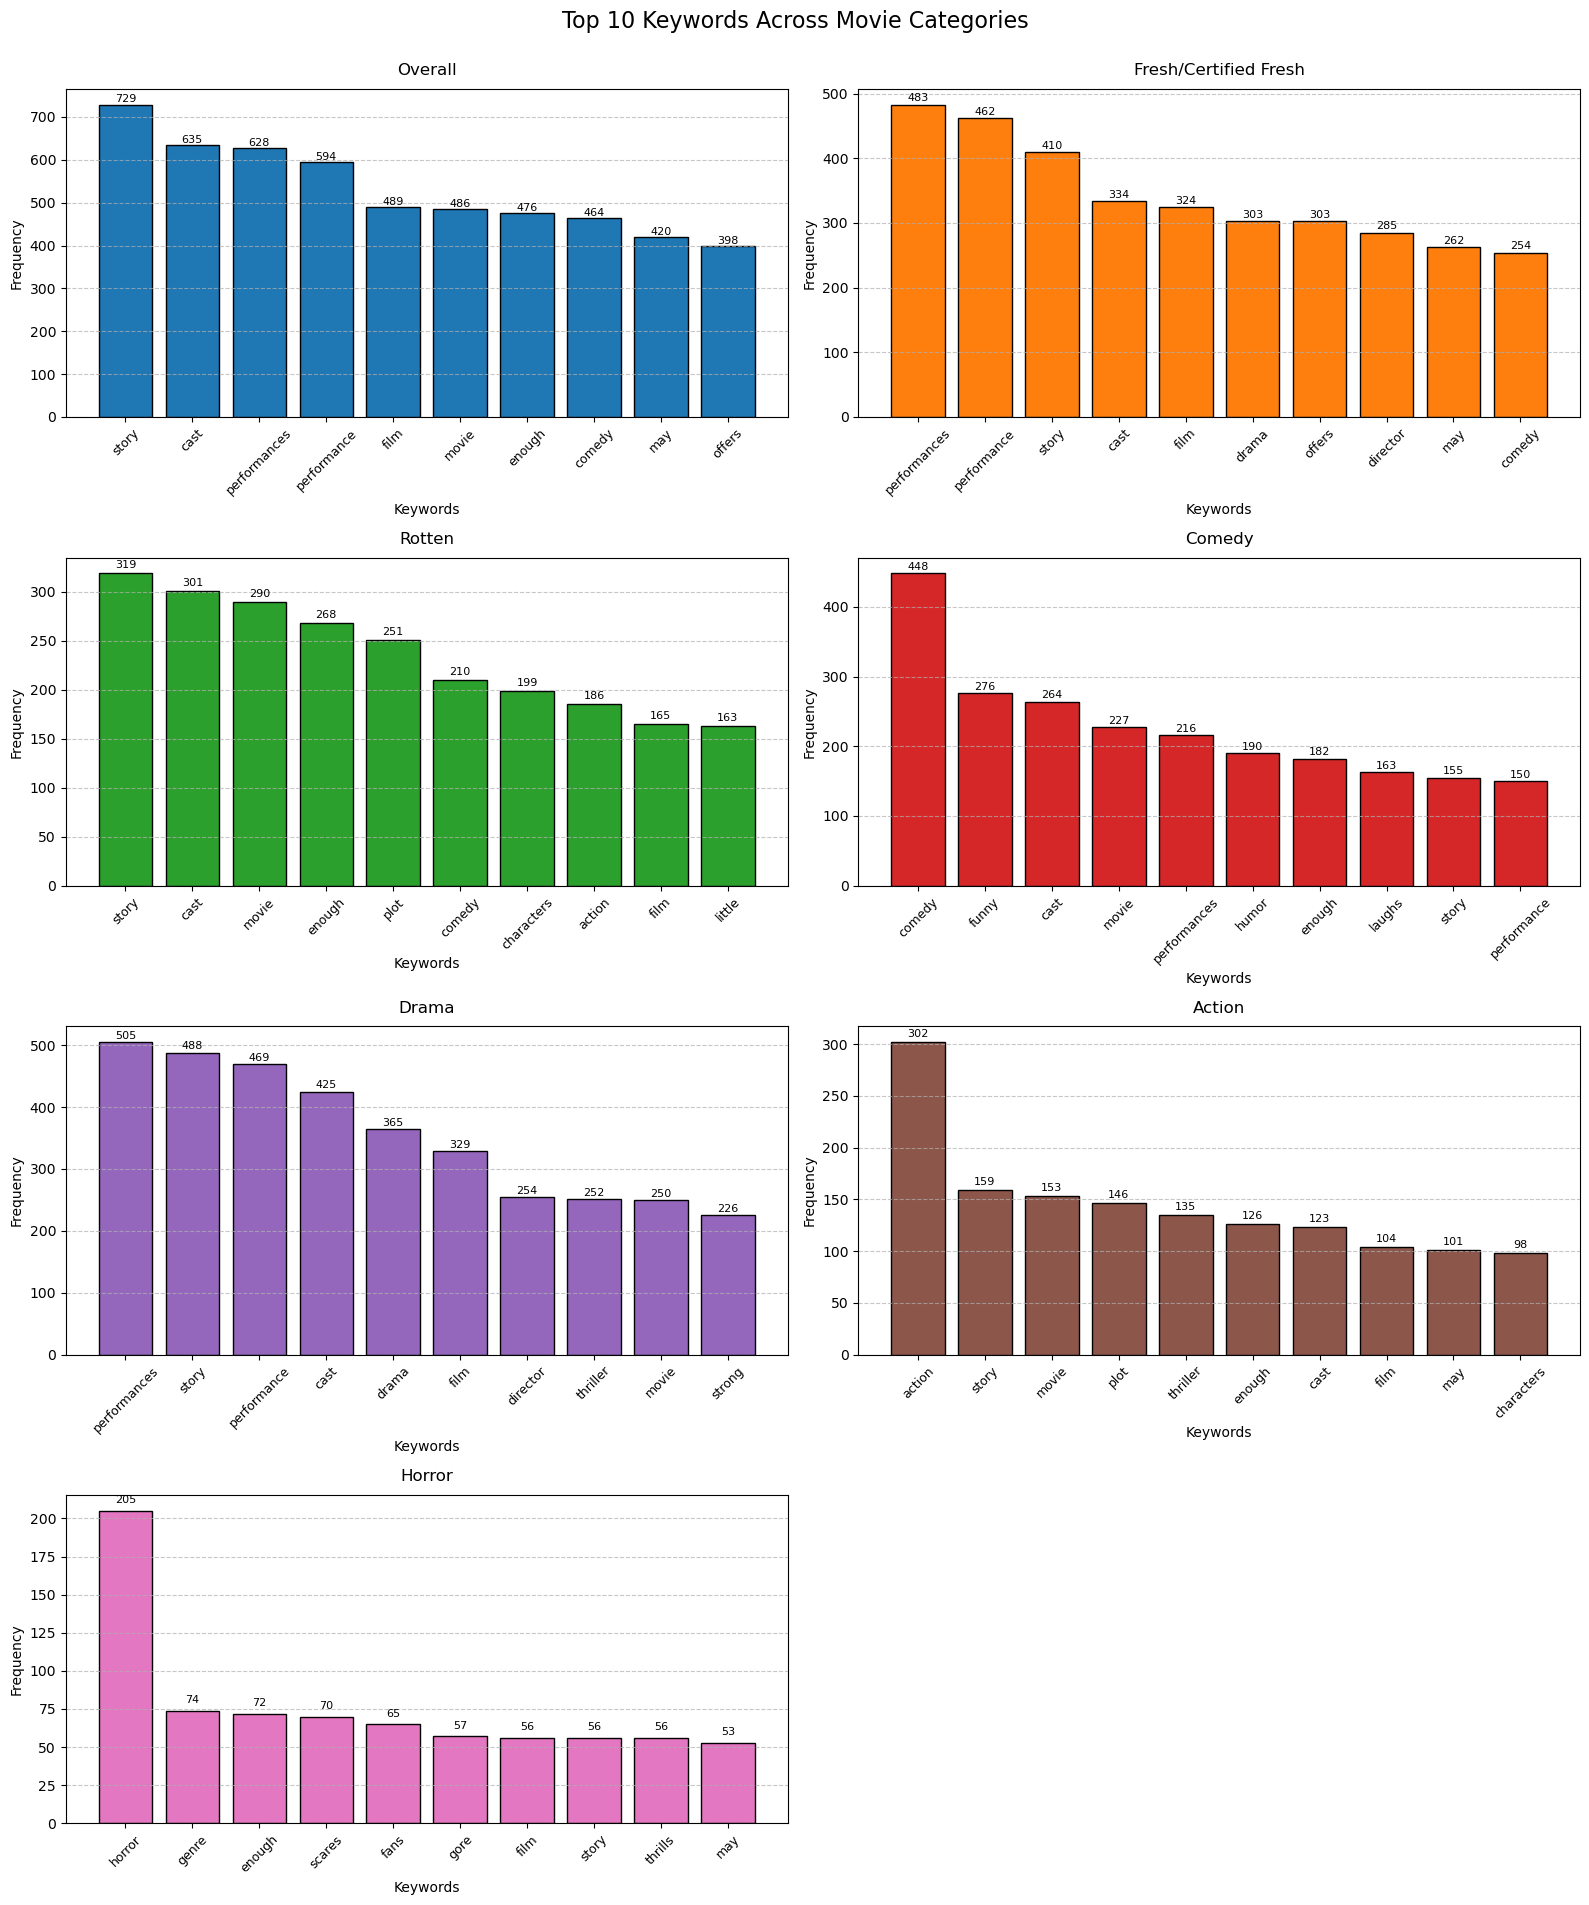

In [2]:
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()